dicom_dir file 

Total DICOM files: 100
File: ID_0000_AGE_0060_CONTRAST_1_CT.dcm
Patient ID: TCGA-17-Z034
Modality: CT
Image Size: (512, 512)
Patient Age: 060Y
Patient Gender: M
Study Date: 19830708
--------------------------------------------------


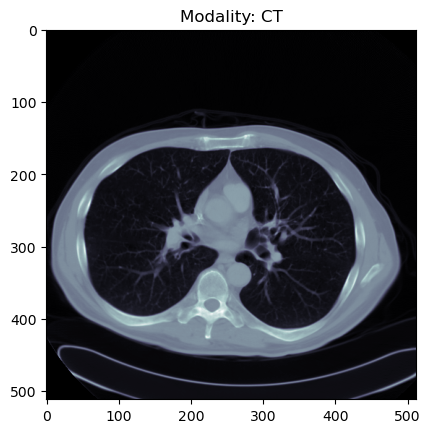

File: ID_0001_AGE_0069_CONTRAST_1_CT.dcm
Patient ID: TCGA-17-Z011
Modality: CT
Image Size: (512, 512)
Patient Age: 069Y
Patient Gender: M
Study Date: 19820630
--------------------------------------------------


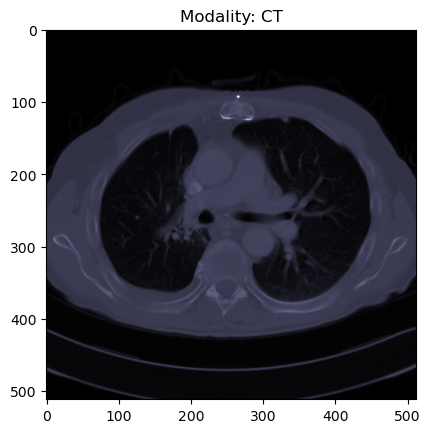

File: ID_0002_AGE_0074_CONTRAST_1_CT.dcm
Patient ID: TCGA-60-2695
Modality: CT
Image Size: (512, 512)
Patient Age: 074Y
Patient Gender: F
Study Date: 19980316
--------------------------------------------------
File: ID_0003_AGE_0075_CONTRAST_1_CT.dcm
Patient ID: TCGA-17-Z054
Modality: CT
Image Size: (512, 512)
Patient Age: 075Y
Patient Gender: M
Study Date: 19860226
--------------------------------------------------
File: ID_0004_AGE_0056_CONTRAST_1_CT.dcm
Patient ID: TCGA-17-Z039
Modality: CT
Image Size: (512, 512)
Patient Age: 056Y
Patient Gender: F
Study Date: 19840210
--------------------------------------------------
File: ID_0005_AGE_0048_CONTRAST_1_CT.dcm
Patient ID: TCGA-17-Z045
Modality: CT
Image Size: (512, 512)
Patient Age: 048Y
Patient Gender: F
Study Date: 19841106
--------------------------------------------------
File: ID_0006_AGE_0075_CONTRAST_1_CT.dcm
Patient ID: TCGA-17-Z054
Modality: CT
Image Size: (512, 512)
Patient Age: 075Y
Patient Gender: M
Study Date: 19860226
-

In [24]:
import pydicom
import os
import csv
import matplotlib.pyplot as plt

# Το path του φακέλου με τα DICOM αρχεία
dicom_folder = r"C:\Users\demh_\Desktop\ΜΕΤΑΠΤΥΧΙΑΚΟ\2ο ΕΞΑΜΗΝΟ\ΜΗΧΑΝΙΚΗ ΜΑΘΗΣΗ\ΟΜΑΔΙΚΗ ΕΡΓΑΣΙΑ\archive\dicom_dir"

# Λίστα των DICOM αρχείων και υπολογισμός πλήθους τους
dicom_files = os.listdir(dicom_folder)
print(f"Total DICOM files: {len(dicom_files)}")

# Δημιουργία αρχείου CSV για αποθήκευση των μεταδεδομένων
with open('dicom_metadata.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["File", "Patient ID", "Modality", "Image Size", "Patient Age", "Patient Gender", "Study Date"])

    # Έλεγχος για duplicate αρχεία
    unique_files = set()

    # Εξαγωγή των πληροφοριών από τα DICOM αρχεία
    for i, dicom_file in enumerate(dicom_files):
        try:
            dicom_file_path = os.path.join(dicom_folder, dicom_file)
            
            # Ανάγνωση του αρχείου DICOM
            dicom_data = pydicom.dcmread(dicom_file_path)
            
        
            # Εμφάνιση των βασικών πληροφοριών
            print(f"File: {dicom_file}")
            print(f"Patient ID: {dicom_data.PatientID}")
            print(f"Modality: {dicom_data.Modality}")
            print(f"Image Size: {dicom_data.pixel_array.shape}")
            print(f"Patient Age: {dicom_data.PatientAge}")
            print(f"Patient Gender: {dicom_data.PatientSex}")
            print(f"Study Date: {dicom_data.StudyDate}")
            print("-" * 50)

            # Εγγραφή δεδομένων στο CSV
            writer.writerow([dicom_file, dicom_data.PatientID, dicom_data.Modality, dicom_data.pixel_array.shape, 
                             dicom_data.PatientAge, dicom_data.PatientSex, dicom_data.StudyDate])

            # Εμφάνιση μόνο των πρώτων δύο εικόνων
            if i < 2:
                plt.imshow(dicom_data.pixel_array, cmap=plt.cm.bone)  # Χρησιμοποιούμε cmap=plt.cm.bone για CT εικόνες
                plt.title(f"Modality: {dicom_data.Modality}")
                plt.show()
        
        except Exception as e:
            print(f"Error reading file {dicom_file}: {e}")

In [ ]:
import os
import hashlib
import pydicom

# Το path του φακέλου με τα DICOM αρχεία
dicom_folder = r"C:\Users\demh_\Desktop\ΜΕΤΑΠΤΥΧΙΑΚΟ\2ο ΕΞΑΜΗΝΟ\ΜΗΧΑΝΙΚΗ ΜΑΘΗΣΗ\ΟΜΑΔΙΚΗ ΕΡΓΑΣΙΑ\archive\dicom_dir"

# Αποθήκευση των hashes των αρχείων
file_hashes = set()
duplicates = 0
unique_files_metadata = set()  # Set για να ελέγξουμε τα metadata (PatientID, Modality, StudyDate)

# Λίστα για να καταγράψεις τα διπλότυπα
duplicates_list = []

# Ανάγνωση των αρχείων στον φάκελο
for dicom_file in os.listdir(dicom_folder):
    if dicom_file.endswith('.dcm'):
        dicom_file_path = os.path.join(dicom_folder, dicom_file)

        try:
            # Ανάγνωση του DICOM αρχείου
            dicom_data = pydicom.dcmread(dicom_file_path)

            # Υπολογισμός hash του περιεχομένου του αρχείου
            file_hash = hashlib.md5()
            with open(dicom_file_path, "rb") as f:
                while chunk := f.read(8192):
                    file_hash.update(chunk)
            
            file_hash = file_hash.hexdigest()

            # Έλεγχος αν το hash υπάρχει ήδη
            if file_hash in file_hashes:
                duplicates_list.append((dicom_file, 'hash'))
            else:
                file_hashes.add(file_hash)

            # Εξαγωγή βασικών μεταδεδομένων για σύγκριση (π.χ., PatientID, Modality, StudyDate)
            metadata_tuple = (dicom_data.PatientID, dicom_data.Modality, dicom_data.StudyDate)

            # Έλεγχος αν τα μεταδεδομένα είναι ίδια με προηγούμενα
            if metadata_tuple in unique_files_metadata:
                duplicates_list.append((dicom_file, 'metadata'))
            else:
                unique_files_metadata.add(metadata_tuple)

        except Exception as e:
            print(f"Error reading DICOM file {dicom_file}: {e}")

# Εκτύπωση των διπλοτύπων
for duplicate in duplicates_list:
    print(f"Duplicate found: {duplicate[0]} based on {duplicate[1]}")

# Εκτύπωση συνολικών διπλοτύπων
print(f"Total duplicates found: {len(duplicates_list)}")


Duplicate found: ID_0006_AGE_0075_CONTRAST_1_CT.dcm based on hash
Duplicate found: ID_0006_AGE_0075_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0013_AGE_0060_CONTRAST_1_CT.dcm based on hash
Duplicate found: ID_0013_AGE_0060_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0017_AGE_0060_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0028_AGE_0074_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0032_AGE_0061_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0034_AGE_0061_CONTRAST_1_CT.dcm based on hash
Duplicate found: ID_0034_AGE_0061_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0043_AGE_0069_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0046_AGE_0072_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0047_AGE_0069_CONTRAST_1_CT.dcm based on metadata
Duplicate found: ID_0061_AGE_0074_CONTRAST_0_CT.dcm based on metadata
Duplicate found: ID_0066_AGE_0082_CONTRAST_0_CT.dcm based on hash
Duplicate found: ID_0066_AGE_0082_CO

In [26]:
# Αρχικοποιούμε μια μεταβλητή για να παρακολουθούμε το μέγεθος της πρώτης εικόνας
first_image_size = None
all_images_same_size = True  # Υποθέτουμε ότι όλες οι εικόνες έχουν το ίδιο μέγεθος, εκτός αν αποδειχθεί το αντίθετο

# Έλεγχος μεγέθους εικόνας για τις εικόνες που έχουν αναγνωστεί ήδη
for dicom_file in dicom_files:
    try:
        dicom_file_path = os.path.join(dicom_folder, dicom_file)
        
        # Ανάγνωση του αρχείου DICOM
        dicom_data = pydicom.dcmread(dicom_file_path)
        
        # Αν είναι η πρώτη εικόνα, αποθηκεύουμε το μέγεθός της
        if first_image_size is None:
            first_image_size = dicom_data.pixel_array.shape
        
        # Έλεγχος αν το μέγεθος της εικόνας διαφέρει από το πρώτο μέγεθος
        if dicom_data.pixel_array.shape != first_image_size:
            all_images_same_size = False
            print(f"Different image size found: {dicom_file} with size {dicom_data.pixel_array.shape}")
    
    except Exception as e:
        print(f"Error reading file {dicom_file}: {e}")

# Αν όλες οι εικόνες έχουν το ίδιο μέγεθος
if all_images_same_size:
    print("All images have the same size:", first_image_size)


All images have the same size: (512, 512)


tiff_images file

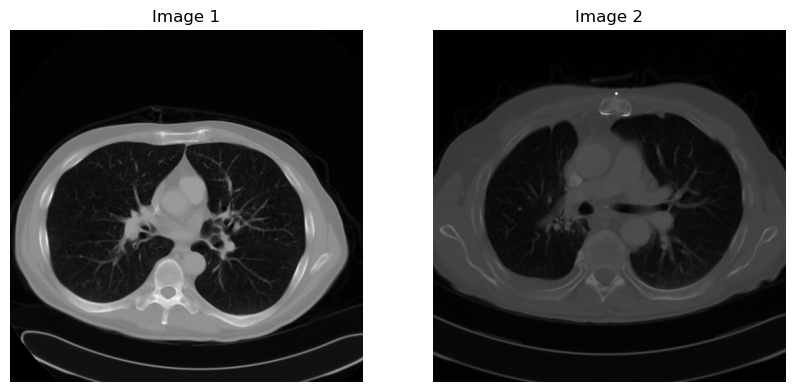

Συνολικός αριθμός εικόνων: 100
Αριθμός διπλοτύπων: 6
Ονόματα των διπλοτύπων:
ID_0006_AGE_0075_CONTRAST_1_CT.tif
ID_0013_AGE_0060_CONTRAST_1_CT.tif
ID_0034_AGE_0061_CONTRAST_1_CT.tif
ID_0066_AGE_0082_CONTRAST_0_CT.tif
ID_0085_AGE_0067_CONTRAST_0_CT.tif
ID_0099_AGE_0061_CONTRAST_0_CT.tif


In [36]:
import tifffile
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hashlib

# Δημιουργία μιας λίστας για την αποθήκευση των μεταδεδομένων
metadata = []

# Συνάρτηση για έλεγχο αν η εικόνα είναι αντιστραμμένη
def is_inverted(image):
    pixel_min, pixel_max = image.min(), image.max()
    if pixel_min == 0 and pixel_max == 255:
        return False  # Η εικόνα δεν είναι αντιστραμμένη
    return True  # Η εικόνα είναι αντιστραμμένη αν έχει άλλες τιμές εκτός του (0, 255)

# Συνάρτηση για τον υπολογισμό του hash της εικόνας
def get_image_hash(image):
    hasher = hashlib.md5()  # Χρησιμοποιούμε το md5 για το hash
    hasher.update(image.tobytes())  # Μετατρέπουμε την εικόνα σε bytes
    return hasher.hexdigest()  # Επιστρέφουμε το hash της εικόνας

# Συνάρτηση για έλεγχο διπλοτύπων
def is_duplicate(image, images_seen_hashes):
    image_hash = get_image_hash(image)  # Υπολογίζουμε το hash της εικόνας
    return image_hash in images_seen_hashes  # Ελέγχουμε αν το hash υπάρχει ήδη στη λίστα

# Ανάγνωση και ανάλυση των αρχείων TIFF
folder_path = r'C:\Users\demh_\Desktop\ΜΕΤΑΠΤΥΧΙΑΚΟ\2ο ΕΞΑΜΗΝΟ\ΜΗΧΑΝΙΚΗ ΜΑΘΗΣΗ\ΟΜΑΔΙΚΗ ΕΡΓΑΣΙΑ\archive\tiff_images'  
images_seen_hashes = set()  # Λίστα για τα hashes των εικόνων
duplicates = 0
duplicate_files = []  # Λίστα για τα ονόματα των διπλοτύπων

# Υπολογισμός του συνολικού αριθμού εικόνων
total_images = 0

for filename in os.listdir(folder_path):
    if filename.endswith('.tiff') or filename.endswith('.tif'):
        filepath = os.path.join(folder_path, filename)
        
        # Φόρτωμα της εικόνας
        image = tifffile.imread(filepath)
        
        # Αύξηση του συνολικού αριθμού εικόνων
        total_images += 1
        
        # Έλεγχος μεγέθους εικόνας
        image_size = image.shape
        is_valid_size = (image_size[0] == 512 and image_size[1] == 512)  # Ελέγχουμε αν είναι 512x512
        
        # Έλεγχος εύρους έντασης pixel
        if len(image.shape) == 2:  # Γκρίσκειλ εικόνα
            pixel_range = (image.min(), image.max())
        elif len(image.shape) == 3:  # RGB εικόνα
            pixel_range = [(image[:,:,i].min(), image[:,:,i].max()) for i in range(3)]
        else:
            pixel_range = None
        
        # Έλεγχος για αντιστροφή εικόνας
        inverted = is_inverted(image)
        
        # Έλεγχος για διπλότυπα
        duplicate = is_duplicate(image, images_seen_hashes)
        if duplicate:
            duplicates += 1
            duplicate_files.append(filename)  # Προσθέτουμε το όνομα του διπλότυπου στη λίστα
        else:
            images_seen_hashes.add(get_image_hash(image))  # Αποθήκευση του hash της εικόνας
        
        # Προσθήκη μεταδεδομένων στη λίστα
        metadata.append({
            'Filename': filename,
            'Image Size': image_size,
            'Image Type': 'Grayscale' if len(image.shape) == 2 else 'RGB',
            'Pixel Range': pixel_range,
            'Is Inverted': inverted,
            'Is Duplicate': duplicate,
            'Valid Size': is_valid_size
        })

# Δημιουργία του DataFrame από τη λίστα
df = pd.DataFrame(metadata)

# Αποθήκευση των μεταδεδομένων σε CSV
df.to_csv('tiff_metadata.csv', index=False)

# Εμφάνιση των πρώτων δύο εικόνων
plt.figure(figsize=(10, 5))
for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.tiff') or filename.endswith('.tif'):
        filepath = os.path.join(folder_path, filename)
        image = tifffile.imread(filepath)
        plt.subplot(1, 2, i+1)
        plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        plt.title(f'Image {i+1}')
        plt.axis('off')
        if i == 1:  # Εμφανίζουμε μόνο τις πρώτες δύο εικόνες
            break
plt.show()

# Εκτύπωση του συνολικού αριθμού εικόνων και των διπλοτύπων
print(f"Συνολικός αριθμός εικόνων: {total_images}")
print(f"Αριθμός διπλοτύπων: {duplicates}")
print("Ονόματα των διπλοτύπων:")
for duplicate in duplicate_files:
    print(duplicate)


In [47]:
import tifffile
import os

# Φάκελος με τις εικόνες TIFF
folder_path = r'C:\Users\demh_\Desktop\ΜΕΤΑΠΤΥΧΙΑΚΟ\2ο ΕΞΑΜΗΝΟ\ΜΗΧΑΝΙΚΗ ΜΑΘΗΣΗ\ΟΜΑΔΙΚΗ ΕΡΓΑΣΙΑ\archive\tiff_images'

# Αρχικοποίηση μεταβλητών
first_image_size = None
all_images_same_size = True  # Υποθέτουμε ότι όλες οι εικόνες έχουν το ίδιο μέγεθος, εκτός αν αποδειχθεί το αντίθετο

# Έλεγχος μεγέθους για κάθε εικόνα στον φάκελο
for filename in os.listdir(folder_path):
    if filename.endswith('.tiff') or filename.endswith('.tif'):
        filepath = os.path.join(folder_path, filename)
        
        # Φόρτωμα της εικόνας
        image = tifffile.imread(filepath)
        
        # Αν είναι η πρώτη εικόνα, αποθηκεύουμε το μέγεθός της
        if first_image_size is None:
            first_image_size = image.shape
        
        # Έλεγχος αν το μέγεθος της εικόνας διαφέρει από το πρώτο μέγεθος
        if image.shape != first_image_size:
            all_images_same_size = False
            print(f"Διαφορά μεγέθους εικόνας: {filename} με μέγεθος {image.shape}")

# Εκτύπωση αποτελεσμάτων
if all_images_same_size:
    print(f"Όλες οι εικόνες έχουν το ίδιο μέγεθος: {first_image_size}")
else:
    print("Δεν έχουν όλες οι εικόνες το ίδιο μέγεθος.")


Όλες οι εικόνες έχουν το ίδιο μέγεθος: (512, 512)


full_archive.npz 

In [32]:
import numpy as np

# Φόρτωση του αρχείου .npz
data = np.load('full_archive.npz', allow_pickle=True)

# Εξαγωγή των κλειδιών
keys = data.files
print("Διαθέσιμα κλειδιά:", keys)

# Προβολή περιεχομένων του αρχείου npz
for key in keys:
    print(f"Περιεχόμενο για το κλειδί {key}:")
    print(data[key])
    print("-----")


Διαθέσιμα κλειδιά: ['image', 'idx']
Περιεχόμενο για το κλειδί image:
[array([[ -973.,  -997., -1024., ...,  -993.,  -979.,  -995.],
        [ -985.,  -977., -1023., ...,  -964., -1024., -1022.],
        [ -973., -1019., -1014., ..., -1024.,  -942.,  -961.],
        ...,
        [-1024.,  -971.,  -935., ..., -1023.,  -989.,  -994.],
        [ -954.,  -928., -1024., ...,  -965., -1024.,  -980.],
        [ -997.,  -996., -1024., ...,  -882.,  -973., -1001.]])
 array([[ -999.,  -998.,  -999., ...,  -998.,  -995.,  -993.],
        [ -998., -1000., -1000., ...,  -995.,  -992.,  -992.],
        [ -998., -1002., -1001., ...,  -995.,  -993.,  -994.],
        ...,
        [-1022., -1022., -1022., ...,  -972.,  -999., -1015.],
        [-1019., -1019., -1022., ..., -1016., -1020., -1020.],
        [-1011., -1009., -1012., ..., -1015., -1013., -1010.]])
 array([[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -102

In [37]:
import numpy as np
import pandas as pd

# Φόρτωση του αρχείου .npz
data = np.load('full_archive.npz', allow_pickle=True)

# Εξαγωγή των κλειδιών
keys = data.files
print("Διαθέσιμα κλειδιά:", keys)

# Αν το αρχείο έχει εικόνες και idx
if 'image' in keys and 'idx' in keys:
    images = data['image']
    idx = data['idx']
    
    # Δημιουργία λίστας για τα δεδομένα που θέλουμε να αποθηκεύσουμε
    image_info = []
    for i in range(len(images)):
        # Υποθέτουμε ότι οι εικόνες είναι 2D ή 3D και θέλουμε να αποθηκεύσουμε τις διαστάσεις τους
        image_info.append({
            'ID': idx[i],  # Αποθηκεύουμε τον αντίστοιχο δείκτη
            'Διαστάσεις': str(images[i].shape)  # Αποθηκεύουμε τις διαστάσεις της εικόνας
        })

    # Δημιουργία DataFrame από τις πληροφορίες
    df = pd.DataFrame(image_info)

    # Αποθήκευση σε CSV
    df.to_csv('image_info.csv', index=False)
    print("Τα δεδομένα αποθηκεύτηκαν στο image_info.csv")

    # Εκτύπωση του συνολικού αριθμού εικόνων
    print(f"Συνολικός αριθμός εικόνων: {len(images)}")
else:
    print("Τα απαιτούμενα κλειδιά ('image', 'idx') δεν υπάρχουν στο αρχείο.")


Διαθέσιμα κλειδιά: ['image', 'idx']
Τα δεδομένα αποθηκεύτηκαν στο image_info.csv
Συνολικός αριθμός εικόνων: 475


# EDA 

Στατιστική Περιγραφή των Δεδομένων

Αρχείο "dicom_metadata.csv" (εξαγόμενο από dicom_dir φάκελο)

   Image Size  Width  Height
0  (512, 512)  512.0   512.0
1  (512, 512)  512.0   512.0
2  (512, 512)  512.0   512.0
3  (512, 512)  512.0   512.0
4  (512, 512)  512.0   512.0

Στατιστική Περιγραφή για τις Διαστάσεις (Πλάτος, Ύψος):
       Width  Height
count  100.0   100.0
mean   512.0   512.0
std      0.0     0.0
min    512.0   512.0
25%    512.0   512.0
50%    512.0   512.0
75%    512.0   512.0
max    512.0   512.0
Στατιστική Περιγραφή για την Ηλικία του Ασθενούς και Διαστάσεις Εικόνας:
       Patient Age  Width  Height
count   100.000000  100.0   100.0
mean     67.480000  512.0   512.0
std       9.274141    0.0     0.0
min      39.000000  512.0   512.0
25%      61.000000  512.0   512.0
50%      70.000000  512.0   512.0
75%      74.000000  512.0   512.0
max      83.000000  512.0   512.0

Κατανομή για το Patient Gender:
Patient Gender
M    54
F    46
Name: count, dtype: int64

Ακραίες Τιμές στην Ηλικία του Ασθενούς:
                                  File    Patient ID Modality  Image S

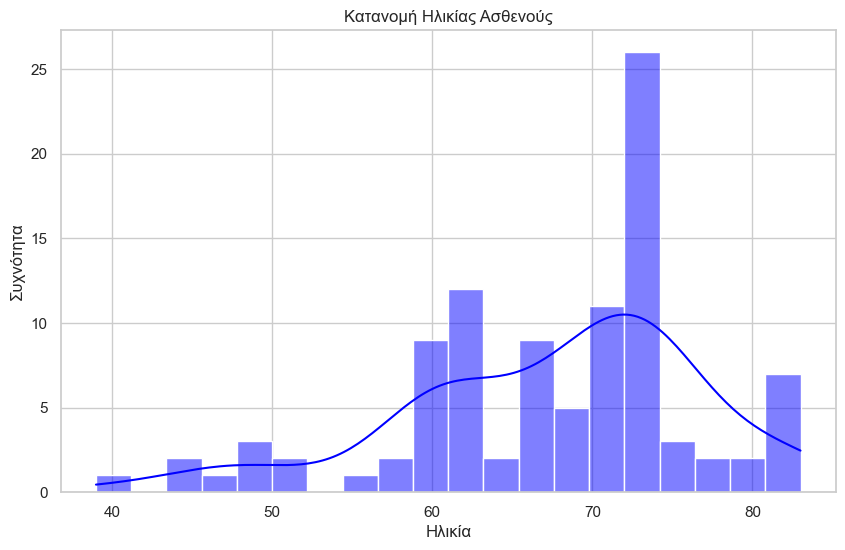


Η κατανομή της ηλικίας των ασθενών δείχνει την κατανομή σε ηλικιακές ομάδες. Υπάρχουν κορυφές γύρω από 70-75, γεγονός που υποδεικνύει ότι οι ασθενείς σε αυτή την μελέτη είναι κυρίως μεγαλύτερης ηλικίας.


C:\Users\demh_\AppData\Local\Temp\ipykernel_4444\52892917.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Patient Gender', data=df_dicom, palette='Set2')


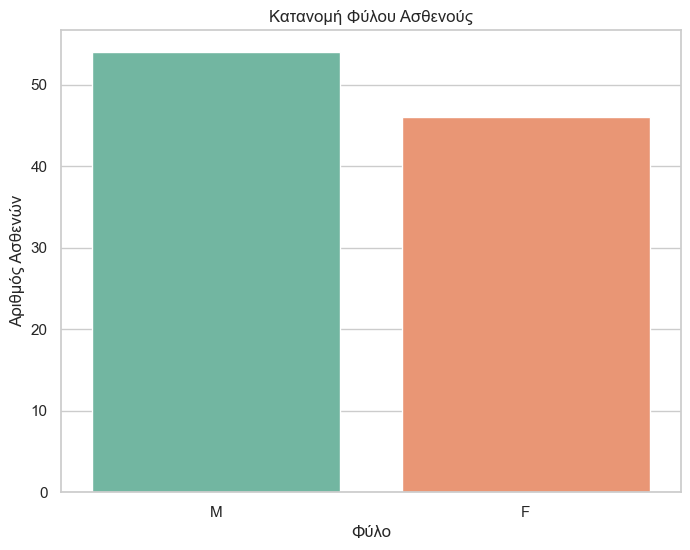


Η κατανομή φύλου δείχνει ότι η μελέτη περιλαμβάνει 54 άνδρες και 46 γυναίκες, γεγονός που υποδεικνύει σχετική ισορροπία ανάμεσα στα φύλα.


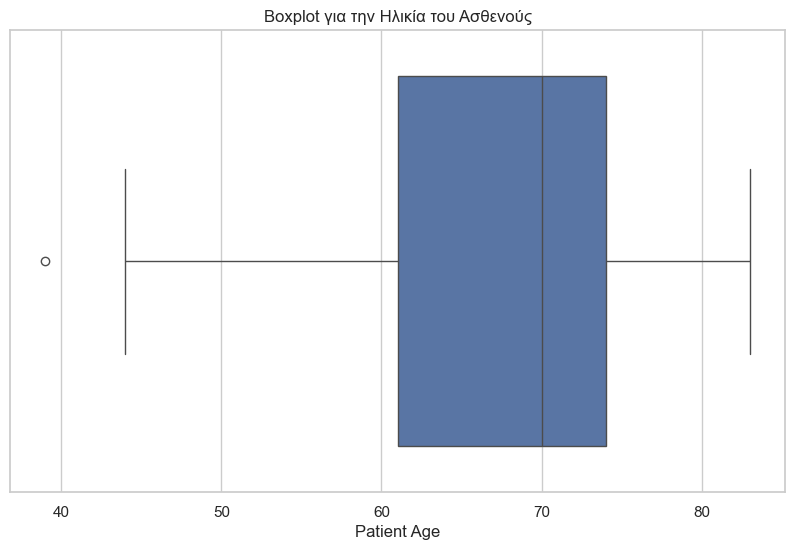


Το boxplot για την ηλικία δείχνει την κατανομή των ηλικιών των ασθενών. Υπάρχει μια διασπορά γύρω από τον μέσο όρο και κάποιες ακραίες τιμές, ιδιαίτερα γύρω από την ηλικία 39.


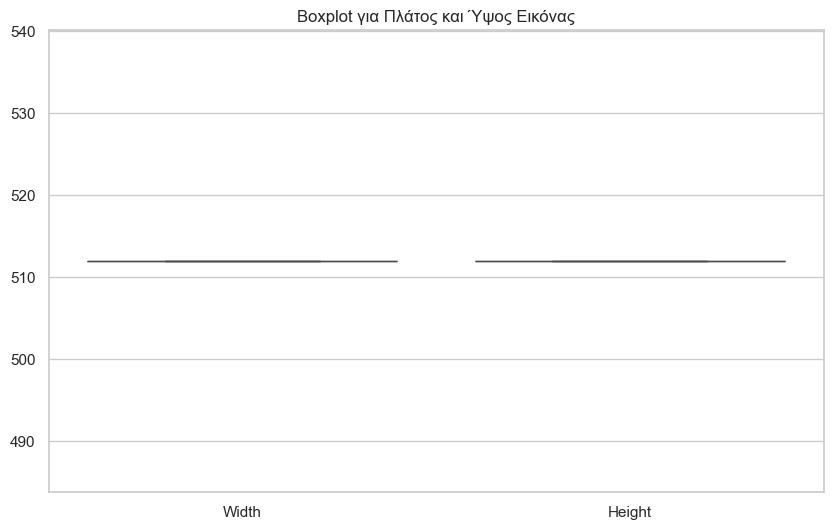


Το boxplot για τις διαστάσεις εικόνας δείχνει ότι το πλάτος και το ύψος είναι σταθερά σε όλα τα δείγματα, με τιμές 512x512 για όλες τις εικόνες.

Η κατανομή του φύλου των ασθενών:
Patient Gender
M    54
F    46
Name: count, dtype: int64


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Φόρτωση του αρχείου dicom_metadata.csv
df_dicom = pd.read_csv('dicom_metadata.csv')

# Καθαρισμός και μετατροπή των δεδομένων (εξαγωγή της ηλικίας και των διαστάσεων εικόνας)
df_dicom['Patient Age'] = df_dicom['Patient Age'].str.replace('Y', '').astype(int)
df_dicom['Image Size'] = df_dicom['Image Size'].fillna('(0, 0)')

# Εξαγωγή των διαστάσεων (πλάτος και ύψος) από την στήλη 'Image Size'
df_dicom['Width'] = df_dicom['Image Size'].str.extract(r'\((\d+),')[0].astype(float)
df_dicom['Height'] = df_dicom['Image Size'].str.extract(r', (\d+)\)')[0].astype(float)

# Εκτύπωση των πρώτων γραμμών για έλεγχο
print(df_dicom[['Image Size', 'Width', 'Height']].head())

# Στατιστική Περιγραφή για τις Διαστάσεις (Πλάτος και Ύψος)
print("\nΣτατιστική Περιγραφή για τις Διαστάσεις (Πλάτος, Ύψος):")
print(df_dicom[['Width', 'Height']].describe())

# Στατιστική Περιγραφή για τα αριθμητικά χαρακτηριστικά
print("Στατιστική Περιγραφή για την Ηλικία του Ασθενούς και Διαστάσεις Εικόνας:")
print(df_dicom[['Patient Age', 'Width', 'Height']].describe())

# Ανάλυση της κατανομής του φύλου του ασθενούς
gender_distribution = df_dicom['Patient Gender'].value_counts()
print("\nΚατανομή για το Patient Gender:")
print(gender_distribution)

# Ανίχνευση Ακραίων Τιμών
# Υπολογισμός IQR για τον εντοπισμό ακραίων τιμών στην Ηλικία
Q1_age = df_dicom['Patient Age'].quantile(0.25)
Q3_age = df_dicom['Patient Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Εντοπισμός ακραίων τιμών για την Ηλικία
outliers_age = df_dicom[(df_dicom['Patient Age'] < lower_bound_age) | (df_dicom['Patient Age'] > upper_bound_age)]
print("\nΑκραίες Τιμές στην Ηλικία του Ασθενούς:")
print(outliers_age)

# Υπολογισμός IQR για τις διαστάσεις εικόνας
Q1_width = df_dicom['Width'].quantile(0.25)
Q3_width = df_dicom['Width'].quantile(0.75)
IQR_width = Q3_width - Q1_width

lower_bound_width = Q1_width - 1.5 * IQR_width
upper_bound_width = Q3_width + 1.5 * IQR_width

# Εντοπισμός ακραίων τιμών για το Πλάτος
outliers_width = df_dicom[(df_dicom['Width'] < lower_bound_width) | (df_dicom['Width'] > upper_bound_width)]
print("\nΑκραίες Τιμές για Πλάτος Εικόνας:")
print(outliers_width)

# Υπολογισμός IQR για το Ύψος
Q1_height = df_dicom['Height'].quantile(0.25)
Q3_height = df_dicom['Height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

# Εντοπισμός ακραίων τιμών για το Ύψος
outliers_height = df_dicom[(df_dicom['Height'] < lower_bound_height) | (df_dicom['Height'] > upper_bound_height)]
print("\nΑκραίες Τιμές για Ύψος Εικόνας:")
print(outliers_height)

# Οπτικοποίηση της κατανομής των ηλικιών (Ιστογράφημα)
plt.figure(figsize=(10, 6))
sns.histplot(df_dicom['Patient Age'], bins=20, kde=True, color='blue')
plt.title('Κατανομή Ηλικίας Ασθενούς')
plt.xlabel('Ηλικία')
plt.ylabel('Συχνότητα')
plt.show()

# Εκτύπωση και ερμηνεία του Ιστογράμματος για Ηλικία
print("\nΗ κατανομή της ηλικίας των ασθενών δείχνει την κατανομή σε ηλικιακές ομάδες. Υπάρχουν κορυφές γύρω από 70-75, γεγονός που υποδεικνύει ότι οι ασθενείς σε αυτή την μελέτη είναι κυρίως μεγαλύτερης ηλικίας.")

# Οπτικοποίηση του φύλου του ασθενούς (Barplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Patient Gender', data=df_dicom, palette='Set2')
plt.title('Κατανομή Φύλου Ασθενούς')
plt.xlabel('Φύλο')
plt.ylabel('Αριθμός Ασθενών')
plt.show()

# Εκτύπωση και ερμηνεία του Barplot για Φύλο
print("\nΗ κατανομή φύλου δείχνει ότι η μελέτη περιλαμβάνει 54 άνδρες και 46 γυναίκες, γεγονός που υποδεικνύει σχετική ισορροπία ανάμεσα στα φύλα.")

# Οπτικοποίηση των δεδομένων για την Ηλικία του Ασθενούς (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_dicom['Patient Age'])
plt.title('Boxplot για την Ηλικία του Ασθενούς')
plt.show()

# Εκτύπωση και ερμηνεία του Boxplot για Ηλικία
print("\nΤο boxplot για την ηλικία δείχνει την κατανομή των ηλικιών των ασθενών. Υπάρχει μια διασπορά γύρω από τον μέσο όρο και κάποιες ακραίες τιμές, ιδιαίτερα γύρω από την ηλικία 39.")

# Οπτικοποίηση των δεδομένων για τις διαστάσεις της εικόνας (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dicom[['Width', 'Height']])
plt.title('Boxplot για Πλάτος και Ύψος Εικόνας')
plt.show()

# Εκτύπωση και ερμηνεία του Boxplot για τις Διαστάσεις
print("\nΤο boxplot για τις διαστάσεις εικόνας δείχνει ότι το πλάτος και το ύψος είναι σταθερά σε όλα τα δείγματα, με τιμές 512x512 για όλες τις εικόνες.")

# Εκτύπωση της διανομής του φύλου του ασθενούς
print("\nΗ κατανομή του φύλου των ασθενών:")
print(gender_distribution)

Αρχείο "image_info.csv" (εξαγόμενο από full_archive.npz)

Στατιστική Περιγραφή για την στήλη 'ID':
count    475.000000
mean     279.023158
std      172.964514
min        0.000000
25%      121.500000
50%      275.000000
75%      431.500000
max      588.000000
Name: ID, dtype: float64

Στατιστική Περιγραφή για τις Διαστάσεις (Πλάτος και Ύψος):
           Πλάτος        Ύψος
count  475.000000  475.000000
mean   505.640000  512.193684
std     56.932143    4.221250
min      3.000000  512.000000
25%    512.000000  512.000000
50%    512.000000  512.000000
75%    512.000000  512.000000
max    545.000000  604.000000

Μέσος Όρος και Τυπική Απόκλιση για Πλάτος και Ύψος:
Μέσος Όρος Πλάτους: 505.64
Τυπική Απόκλιση Πλάτους: 56.932142597652984
Μέσος Όρος Ύψους: 512.1936842105263
Τυπική Απόκλιση Ύψους: 4.221249503218335


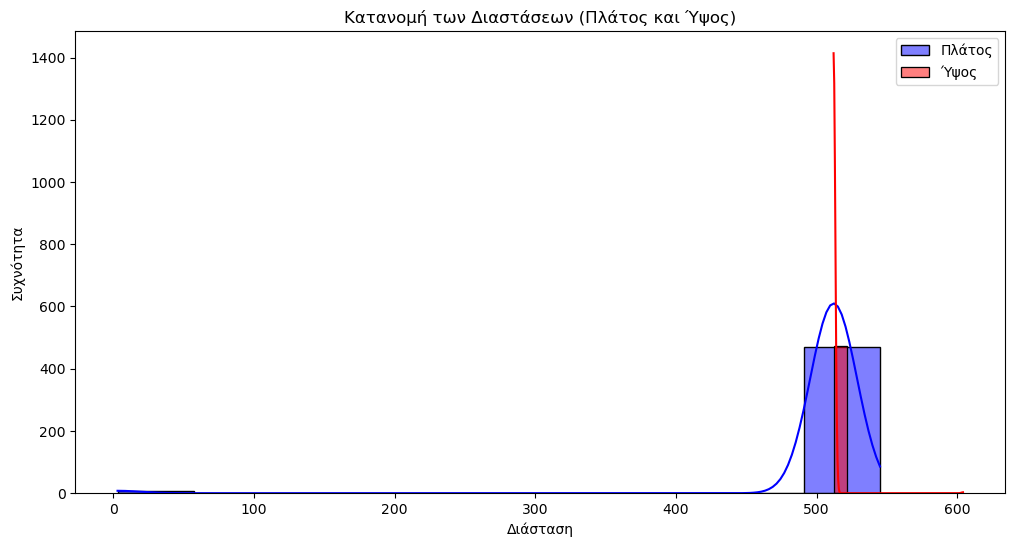


Κατανομή Πλάτους:
Πλάτος
512    468
3        6
545      1
Name: count, dtype: int64

Κατανομή Ύψους:
Ύψος
512    474
604      1
Name: count, dtype: int64
Δεν υπάρχουν διπλότυπα στο ID.
Διπλότυπες διαστάσεις:
      ID  Διαστάσεις  Πλάτος  Ύψος
0      0  (512, 512)     512   512
1      1  (512, 512)     512   512
2      2  (512, 512)     512   512
3      3  (512, 512)     512   512
4      4  (512, 512)     512   512
..   ...         ...     ...   ...
470  584  (512, 512)     512   512
471  585  (512, 512)     512   512
472  586  (512, 512)     512   512
473  587  (512, 512)     512   512
474  588  (512, 512)     512   512

[473 rows x 4 columns]
Δεν υπάρχουν διπλότυπα με συνδυασμό ID και Διαστάσεων.

Στατιστικά για τα Boxplots:

Πλάτος - Ελάχιστο: 3, 1ο Τεταρτημόριο: 512.0, Διάμεσος: 512.0, 3ο Τεταρτημόριο: 512.0, Μέγιστο: 545

Ύψος - Ελάχιστο: 512, 1ο Τεταρτημόριο: 512.0, Διάμεσος: 512.0, 3ο Τεταρτημόριο: 512.0, Μέγιστο: 604


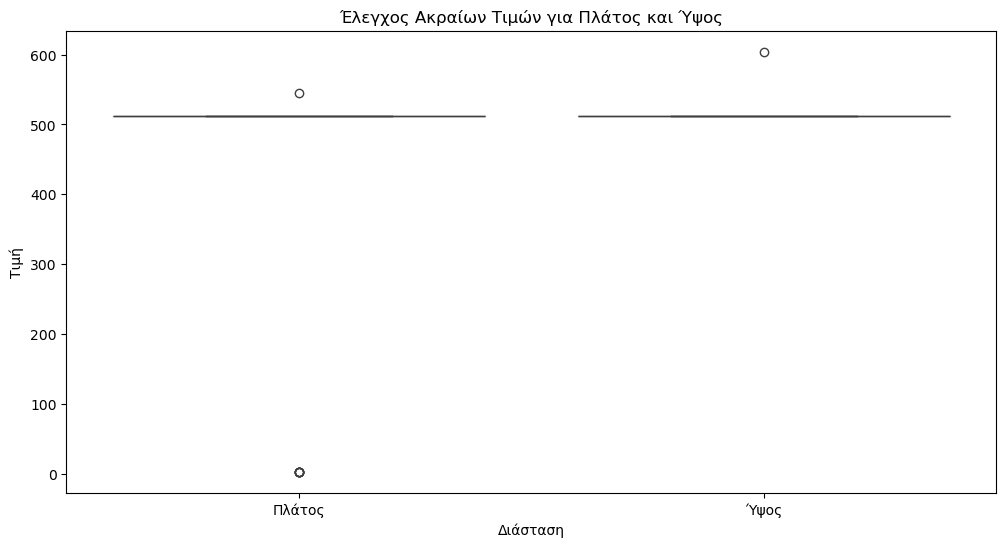

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Φόρτωση του αρχείου image_info.csv
df = pd.read_csv('image_info.csv')

# Στατιστική Περιγραφή για την στήλη 'ID' (μόνο για στατιστικά μέτρα)
print("Στατιστική Περιγραφή για την στήλη 'ID':")
print(df['ID'].describe())

# Επεξεργασία της στήλης 'Διαστάσεις' για να την κάνουμε αριθμητική
# Θα χωρίσουμε τις διαστάσεις σε ύψος και πλάτος (και αν είναι 3D σε βάθος)
def process_dimensions(dim):
    if '(' in dim:
        # Εξαγωγή των διαστάσεων από την συμβολοσειρά (π.χ. (512, 512) -> 512, 512)
        dims = dim.strip('()').split(',')
        return [int(dims[0]), int(dims[1])]
    else:
        return [0, 0]  # Αν δεν υπάρχει διάσταση (π.χ. για την 3D εικόνα)

# Εφαρμογή της συνάρτησης για κάθε γραμμή στη στήλη "Διαστάσεις"
df[['Πλάτος', 'Ύψος']] = df['Διαστάσεις'].apply(process_dimensions).apply(pd.Series)

# Στατιστική Περιγραφή για τις διαστάσεις των εικόνων
print("\nΣτατιστική Περιγραφή για τις Διαστάσεις (Πλάτος και Ύψος):")
print(df[['Πλάτος', 'Ύψος']].describe())

# Εμφάνιση του μέσου όρου και της τυπικής απόκλισης για κάθε στήλη
print("\nΜέσος Όρος και Τυπική Απόκλιση για Πλάτος και Ύψος:")
print(f"Μέσος Όρος Πλάτους: {df['Πλάτος'].mean()}")
print(f"Τυπική Απόκλιση Πλάτους: {df['Πλάτος'].std()}")
print(f"Μέσος Όρος Ύψους: {df['Ύψος'].mean()}")
print(f"Τυπική Απόκλιση Ύψους: {df['Ύψος'].std()}")

# Ανάλυση της κατανομής των διαστάσεων (Πλάτος, Ύψος)
plt.figure(figsize=(12, 6))
sns.histplot(df['Πλάτος'], kde=True, color='blue', label='Πλάτος')
sns.histplot(df['Ύψος'], kde=True, color='red', label='Ύψος')
plt.legend()
plt.title('Κατανομή των Διαστάσεων (Πλάτος και Ύψος)')
plt.xlabel('Διάσταση')
plt.ylabel('Συχνότητα')
plt.show()

# Εμφάνιση αριθμητικών στοιχείων που σχετίζονται με τα γραφήματα
print("\nΚατανομή Πλάτους:")
print(df['Πλάτος'].value_counts().head())  # Εκτύπωση των πιο συχνών τιμών του Πλάτους
print("\nΚατανομή Ύψους:")
print(df['Ύψος'].value_counts().head())  # Εκτύπωση των πιο συχνών τιμών του Ύψους

# Έλεγχος για διπλότυπα (ID, Διαστάσεις)
# Έλεγχος για διπλότυπα στο ID
duplicate_ids = df[df.duplicated(subset=['ID'], keep=False)]  # Εμφάνιση όλων των διπλότυπων IDs
if not duplicate_ids.empty:
    print(f"Διπλότυπα IDs:\n{duplicate_ids}")
else:
    print("Δεν υπάρχουν διπλότυπα στο ID.")

# Έλεγχος για διπλότυπες διαστάσεις
duplicate_dimensions = df[df.duplicated(subset=['Διαστάσεις'], keep=False)]  # Εμφάνιση όλων των διπλότυπων διαστάσεων
if not duplicate_dimensions.empty:
    print(f"Διπλότυπες διαστάσεις:\n{duplicate_dimensions}")
else:
    print("Δεν υπάρχουν διπλότυπες διαστάσεις.")

# Έλεγχος για διπλότυπα με συνδυασμό ID και Διαστάσεων
duplicate_combined = df[df.duplicated(subset=['ID', 'Διαστάσεις'], keep=False)]  # Εμφάνιση όλων των διπλοτύπων (ID + Διαστάσεις)
if not duplicate_combined.empty:
    print(f"Διπλότυπα με συνδυασμό ID και Διαστάσεων:\n{duplicate_combined}")
else:
    print("Δεν υπάρχουν διπλότυπα με συνδυασμό ID και Διαστάσεων.")

# Εντοπισμός ακραίων τιμών για τα μεγέθη (Πλάτος, Ύψος)
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(df[['Πλάτος', 'Ύψος']]))

# Εκτύπωση στατιστικών στοιχείων για τα Boxplots
print("\nΣτατιστικά για τα Boxplots:")
for dim in ['Πλάτος', 'Ύψος']:
    print(f"\n{dim} - Ελάχιστο: {df[dim].min()}, 1ο Τεταρτημόριο: {df[dim].quantile(0.25)}, "
          f"Διάμεσος: {df[dim].median()}, 3ο Τεταρτημόριο: {df[dim].quantile(0.75)}, Μέγιστο: {df[dim].max()}")

plt.title('Έλεγχος Ακραίων Τιμών για Πλάτος και Ύψος')
plt.xlabel('Διάσταση')
plt.ylabel('Τιμή')
plt.show()


In [48]:
import pandas as pd

# Φόρτωση του αρχείου image_info.csv
df = pd.read_csv('image_info.csv')

# Έλεγχος για διπλότυπα στο ID
duplicate_ids = df[df.duplicated(subset=['ID'], keep=False)]  # Εμφάνιση όλων των διπλότυπων IDs

if not duplicate_ids.empty:
    print(f"Διπλότυπα IDs:\n{duplicate_ids}")
else:
    print("Δεν υπάρχουν διπλότυπα στο ID.")

# Έλεγχος για διπλότυπες διαστάσεις
duplicate_dimensions = df[df.duplicated(subset=['Διαστάσεις'], keep=False)]  # Εμφάνιση όλων των διπλότυπων διαστάσεων

if not duplicate_dimensions.empty:
    print(f"Διπλότυπες διαστάσεις:\n{duplicate_dimensions}")
else:
    print("Δεν υπάρχουν διπλότυπες διαστάσεις.")

# Έλεγχος για διπλότυπα με συνδυασμό ID και Διαστάσεων
duplicate_combined = df[df.duplicated(subset=['ID', 'Διαστάσεις'], keep=False)]  # Εμφάνιση όλων των διπλοτύπων (ID + Διαστάσεις)

if not duplicate_combined.empty:
    print(f"Διπλότυπα με συνδυασμό ID και Διαστάσεων:\n{duplicate_combined}")
else:
    print("Δεν υπάρχουν διπλότυπα με συνδυασμό ID και Διαστάσεων.")


Δεν υπάρχουν διπλότυπα στο ID.
Διπλότυπες διαστάσεις:
      ID  Διαστάσεις
0      0  (512, 512)
1      1  (512, 512)
2      2  (512, 512)
3      3  (512, 512)
4      4  (512, 512)
..   ...         ...
470  584  (512, 512)
471  585  (512, 512)
472  586  (512, 512)
473  587  (512, 512)
474  588  (512, 512)

[473 rows x 2 columns]
Δεν υπάρχουν διπλότυπα με συνδυασμό ID και Διαστάσεων.


In [41]:
import pandas as pd
import numpy as np

# Φόρτωμα του αρχείου image_info.csv
df = pd.read_csv('image_info.csv')

# Υπολογισμός αν υπάρχουν διαφορετικές διαστάσεις
unique_dimensions = df['Διαστάσεις'].unique()

# Εμφάνιση των μοναδικών διαστάσεων
print(f"Μοναδικές διαστάσεις εικόνας: {unique_dimensions}")

# Εάν υπάρχουν περισσότερες από μία διάσταση, αναζητούμε τις εικόνες με διαφορετικές διαστάσεις
if len(unique_dimensions) > 1:
    print("\nΕικόνες με διαφορετικές διαστάσεις:")
    for dimension in unique_dimensions:
        images_with_dimension = df[df['Διαστάσεις'] == dimension]
        print(f"\nΕικόνες με διαστάσεις {dimension}:")
        print(images_with_dimension[['ID', 'Διαστάσεις']])
else:
    print("Όλες οι εικόνες έχουν τις ίδιες διαστάσεις.")


Μοναδικές διαστάσεις εικόνας: ['(512, 512)' '(545, 512)' '(3, 512, 512)' '(512, 604)']

Εικόνες με διαφορετικές διαστάσεις:

Εικόνες με διαστάσεις (512, 512):
      ID  Διαστάσεις
0      0  (512, 512)
1      1  (512, 512)
2      2  (512, 512)
3      3  (512, 512)
4      4  (512, 512)
..   ...         ...
470  584  (512, 512)
471  585  (512, 512)
472  586  (512, 512)
473  587  (512, 512)
474  588  (512, 512)

[467 rows x 2 columns]

Εικόνες με διαστάσεις (545, 512):
      ID  Διαστάσεις
276  323  (545, 512)

Εικόνες με διαστάσεις (3, 512, 512):
      ID     Διαστάσεις
330  398  (3, 512, 512)
331  401  (3, 512, 512)
340  410  (3, 512, 512)
342  412  (3, 512, 512)
398  482  (3, 512, 512)
400  484  (3, 512, 512)

Εικόνες με διαστάσεις (512, 604):
      ID  Διαστάσεις
406  492  (512, 604)


# Preprocessing 

Resize στις διαστάσεις του image_info.csv και κανονικοποίηση των Pixel του full_archive.npz

In [46]:
import numpy as np
import pandas as pd
from PIL import Image

# Φόρτωμα του αρχείου full_archive.npz
npz_data = np.load('full_archive.npz', allow_pickle=True)

# Διαθέσιμα κλειδιά στο npz αρχείο
print("Διαθέσιμα κλειδιά στο npz αρχείο:", npz_data.files)

# Φόρτωση των δεδομένων για τις εικόνες και τα idx
image_data = npz_data['image']  # Οι εικόνες
idx_data = npz_data['idx']  # τα μεταδεδομένα (ID)

# Εξετάζουμε τα δεδομένα για τις εικόνες
print(f"Μέγεθος δεδομένων εικόνας: {image_data.shape}")  # Μέγεθος των δεδομένων εικόνας
print(f"Δείγμα δεδομένων idx: {idx_data[:5]}")  # Εμφάνιση των πρώτων 5 στοιχείων του idx (μεταδεδομένα)

# Φόρτωμα του αρχείου image_info.csv
df = pd.read_csv('image_info.csv')

# Δημιουργία νέου DataFrame για επεξεργασία εικόνας και συγχώνευση με τα μεταδεδομένα
processed_metadata = []

# Λειτουργία για αλλαγή μεγέθους εικόνας σε 512x512 και μετατροπή σε grayscale αν είναι RGB
def resize_and_convert_image(image):
    # Αν η εικόνα είναι RGB (π.χ., (3, 512, 512)), την μετατρέπουμε σε grayscale
    if len(image.shape) == 3 and image.shape[0] == 3:
        image = np.mean(image, axis=0).astype(np.uint8)  # Μετατροπή σε grayscale (μέσος όρος)
    
    # Χρησιμοποιούμε PIL για να αλλάξουμε το μέγεθος της εικόνας σε 512x512
    pil_image = Image.fromarray(image)  # Μετατροπή σε εικόνα PIL
    pil_image = pil_image.resize((512, 512))  # Επανασχεδίαση σε 512x512
    return np.array(pil_image)  # Επιστροφή της εικόνας ως array numpy

# Επεξεργασία εικόνας
for idx, image in enumerate(image_data):
    # Επεξεργασία κάθε εικόνας
    processed_image = resize_and_convert_image(image)
    
    # Αποθήκευση των επεξεργασμένων μεταδεδομένων
    processed_metadata.append({
        'ID': idx_data[idx],  # Το ID είναι απλώς ο αριθμός από το idx_data
        'Original Dimensions': image.shape,
        'Processed Dimensions': processed_image.shape,
    })

# Δημιουργία του DataFrame για τα επεξεργασμένα δεδομένα
processed_df = pd.DataFrame(processed_metadata)

# Στη συνέχεια, συγχωνεύουμε τα δεδομένα του image_info.csv με το επεξεργασμένο DataFrame
final_df = pd.merge(df, processed_df, on='ID', how='left')

# Αποθήκευση του τελικού CSV αρχείου
final_df.to_csv('final_image_info.csv', index=False)

print("Συγχώνευση και επεξεργασία ολοκληρώθηκε.")

Διαθέσιμα κλειδιά στο npz αρχείο: ['image', 'idx']
Μέγεθος δεδομένων εικόνας: (475,)
Δείγμα δεδομένων idx: [0 1 2 3 4]
Συγχώνευση και επεξεργασία ολοκληρώθηκε.


Για να ελέγξουμε τις επαναλαμβανόμενες εικόνες και να κατανοήσουμε πώς σχετίζονται οι εγγραφές του αρχείου image_info.csv με τα υπόλοιπα αρχεία CSV, προτείνω να ακολουθήσουμε τα παρακάτω βήματα:

In [17]:
import pandas as pd

# Διαβάζουμε τα αρχεία CSV
tiff_metadata = pd.read_csv('tiff_metadata.csv')
dicom_metadata = pd.read_csv('dicom_metadata.csv')
image_info = pd.read_csv('image_info.csv')
overview = pd.read_csv('overview.csv')

# Εξασφαλίζουμε ότι τα πεδία είναι σωστά μορφοποιημένα (χωρίς κενά)
tiff_metadata['Filename'] = tiff_metadata['Filename'].str.strip()
dicom_metadata['File'] = dicom_metadata['File'].str.strip()

# Μετατροπή των ID σε string ώστε να αποφύγουμε τα σφάλματα τύπων
image_info['ID'] = image_info['ID'].astype(str).str.strip()
overview['id'] = overview['id'].astype(str).str.strip()

# 1. Συγχώνευση overview με image_info με βάση το id και ID
# Το id στο overview αντιστοιχεί στο ID στο image_info, οπότε συνδυάζουμε αυτές τις δύο στήλες
merged_overview_image_info = pd.merge(overview, image_info, left_on='id', right_on='ID', how='inner')

# 2. Συγχώνευση με το tiff_metadata με βάση το tiff_name
merged_tiff = pd.merge(merged_overview_image_info, tiff_metadata, left_on='tiff_name', right_on='Filename', how='inner')

# 3. Συγχώνευση με το dicom_metadata με βάση το dicom_name
final_merged = pd.merge(merged_tiff, dicom_metadata, left_on='dicom_name', right_on='File', how='inner')

# Εξάγουμε το τελικό αρχείο
final_merged.to_csv('merged_data.csv', index=False)

# Εμφανίζουμε τα πρώτα 5 αποτελέσματα για να ελέγξουμε τη συγχώνευση
print(final_merged.head())



   Unnamed: 0  Age  Contrast ContrastTag  \
0           0   60      True        NONE   
1           1   69      True        NONE   
2           2   74      True     APPLIED   
3           3   75      True        NONE   
4           4   56      True        NONE   

                                      raw_input_path id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm  0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm  1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm  2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm  3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm  4   

                            tiff_name                          dicom_name ID  \
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  0   
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  1   
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm  2   
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif  ID_0003_AGE_0075_CONT

In [18]:
# Διαβάζουμε το τελικό merged αρχείο
merged_data = pd.read_csv('merged_data.csv')

# Ελέγχουμε πόσα unique IDs υπάρχουν στο merged_data
unique_ids_in_merged = merged_data['ID'].nunique()
print(f"Unique IDs στο merged αρχείο: {unique_ids_in_merged}")

# Ελέγχουμε αν τα 475 IDs του image_info είναι όλα παρόντα στο merged_data
image_info_ids = image_info['ID'].unique()
merged_data_ids = merged_data['ID'].unique()

# Ελέγχουμε αν όλα τα IDs του image_info περιλαμβάνονται στο merged_data
missing_ids = set(image_info_ids) - set(merged_data_ids)
print(f"Αριθμός missing IDs: {len(missing_ids)}")

Unique IDs στο merged αρχείο: 98
Αριθμός missing IDs: 475


In [20]:
import pandas as pd

# Διαβάζουμε τα αρχεία CSV
tiff_metadata = pd.read_csv('tiff_metadata.csv')
dicom_metadata = pd.read_csv('dicom_metadata.csv')
image_info = pd.read_csv('image_info.csv')
overview = pd.read_csv('overview.csv')

# Εξασφαλίζουμε ότι τα πεδία είναι σωστά μορφοποιημένα (χωρίς κενά)
tiff_metadata['Filename'] = tiff_metadata['Filename'].str.strip()
dicom_metadata['File'] = dicom_metadata['File'].str.strip()
image_info['ID'] = image_info['ID'].astype(str)  # Διασφαλίζουμε ότι η στήλη ID είναι string
overview['id'] = overview['id'].astype(str)  # Διασφαλίζουμε ότι η στήλη id είναι string

# 1. Συγχώνευση overview με image_info με βάση το id του ασθενούς και το ID της εικόνας
merged_overview_image_info = pd.merge(overview, image_info, left_on='id', right_on='ID', how='left')

# Ελέγχουμε τον αριθμό των γραμμών μετά τη συγχώνευση
print(f"Αριθμός γραμμών μετά τη συγχώνευση overview με image_info: {merged_overview_image_info.shape[0]}")

# 2. Συγχώνευση με το tiff_metadata με βάση το tiff_name
merged_tiff = pd.merge(merged_overview_image_info, tiff_metadata, left_on='tiff_name', right_on='Filename', how='left')

# 3. Συγχώνευση με το dicom_metadata με βάση το dicom_name
final_merged = pd.merge(merged_tiff, dicom_metadata, left_on='dicom_name', right_on='File', how='left')

# Εξάγουμε το τελικό αρχείο
final_merged.to_csv('final_merged_data.csv', index=False)

# Εμφανίζουμε τα πρώτα 5 αποτελέσματα για να ελέγξουμε τη συγχώνευση
print(final_merged.head())

# Ελέγχουμε πόσα δεδομένα λείπουν από το τελικό merged αρχείο
missing_images = final_merged[final_merged['ID'].isnull()]
print(f"Αριθμός εικόνων που λείπουν από το τελικό αρχείο: {missing_images.shape[0]}")

# Αν θέλουμε να δούμε πόσες μοναδικές εικόνες έχουμε και τις στήλες του τελικού αρχείου:
print(f"Αριθμός μοναδικών IDs στο τελικό αρχείο: {final_merged['ID'].nunique()}")
print(f"Αριθμός γραμμών στο τελικό αρχείο: {final_merged.shape[0]}")
print(f"Στήλες του τελικού αρχείου: {final_merged.columns}")


Αριθμός γραμμών μετά τη συγχώνευση overview με image_info: 100
   Unnamed: 0  Age  Contrast ContrastTag  \
0           0   60      True        NONE   
1           1   69      True        NONE   
2           2   74      True     APPLIED   
3           3   75      True        NONE   
4           4   56      True        NONE   

                                      raw_input_path id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm  0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm  1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm  2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm  3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm  4   

                            tiff_name                          dicom_name ID  \
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  0   
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  1   
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm  2 

In [21]:
# Ελέγχουμε πόσες εικόνες περιλαμβάνονται στο τελικό αρχείο
images_in_final = final_merged['ID'].nunique()  # Αριθμός μοναδικών εικόνων στο τελικό αρχείο
print(f"Αριθμός μοναδικών εικόνων στο τελικό αρχείο: {images_in_final}")

# Ελέγχουμε αν υπάρχει κάποια εικόνα από το image_info που λείπει από το τελικό αρχείο
missing_images = image_info[~image_info['ID'].isin(final_merged['ID'])]
print(f"Αριθμός εικόνων που λείπουν από το τελικό αρχείο: {missing_images.shape[0]}")


Αριθμός μοναδικών εικόνων στο τελικό αρχείο: 98
Αριθμός εικόνων που λείπουν από το τελικό αρχείο: 377


In [22]:
import pandas as pd

# Διαβάζουμε τα αρχεία CSV
tiff_metadata = pd.read_csv('tiff_metadata.csv')
dicom_metadata = pd.read_csv('dicom_metadata.csv')
image_info = pd.read_csv('image_info.csv')
overview = pd.read_csv('overview.csv')

# Εξασφαλίζουμε ότι τα πεδία είναι σωστά μορφοποιημένα (χωρίς κενά)
tiff_metadata['Filename'] = tiff_metadata['Filename'].str.strip()
dicom_metadata['File'] = dicom_metadata['File'].str.strip()
image_info['ID'] = image_info['ID'].astype(str)  # Διασφαλίζουμε ότι η στήλη ID είναι string
overview['id'] = overview['id'].astype(str)  # Διασφαλίζουμε ότι η στήλη id είναι string

# 1. Επαλήθευση αν υπάρχουν κοινά IDs στο overview.csv και το image_info.csv
common_ids = set(overview['id']).intersection(set(image_info['ID']))
print(f"Αριθμός κοινών IDs: {len(common_ids)}")

# 2. Συγχώνευση overview με image_info με βάση το id του ασθενούς και το ID της εικόνας (outer join)
merged_overview_image_info = pd.merge(overview, image_info, left_on='id', right_on='ID', how='outer')

# Ελέγχουμε τον αριθμό των γραμμών μετά τη συγχώνευση
print(f"Αριθμός γραμμών μετά τη συγχώνευση overview με image_info: {merged_overview_image_info.shape[0]}")

# 3. Συγχώνευση με το tiff_metadata με βάση το tiff_name (outer join)
merged_tiff = pd.merge(merged_overview_image_info, tiff_metadata, left_on='tiff_name', right_on='Filename', how='outer')

# 4. Συγχώνευση με το dicom_metadata με βάση το dicom_name (outer join)
final_merged = pd.merge(merged_tiff, dicom_metadata, left_on='dicom_name', right_on='File', how='outer')

# Εξάγουμε το τελικό αρχείο
final_merged.to_csv('final_merged_data.csv', index=False)

# Εμφανίζουμε τα πρώτα 5 αποτελέσματα για να ελέγξουμε τη συγχώνευση
print(final_merged.head())

# Ελέγχουμε πόσα δεδομένα λείπουν από το τελικό merged αρχείο
missing_images = final_merged[final_merged['ID'].isnull()]
print(f"Αριθμός εικόνων που λείπουν από το τελικό αρχείο: {missing_images.shape[0]}")

# Αναφορά εικόνων χωρίς ασθενή
missing_patients = final_merged[final_merged['id'].isnull()]
print(f"Αριθμός εικόνων χωρίς ασθενή: {missing_patients.shape[0]}")
print(missing_patients[['ID', 'tiff_name', 'dicom_name']])

# Αν θέλουμε να δούμε πόσες μοναδικές εικόνες έχουμε και τις στήλες του τελικού αρχείου:
print(f"Αριθμός μοναδικών IDs στο τελικό αρχείο: {final_merged['ID'].nunique()}")
print(f"Αριθμός γραμμών στο τελικό αρχείο: {final_merged.shape[0]}")
print(f"Στήλες του τελικού αρχείου: {final_merged.columns}")


Αριθμός κοινών IDs: 98
Αριθμός γραμμών μετά τη συγχώνευση overview με image_info: 477
   Unnamed: 0   Age Contrast ContrastTag  \
0         0.0  60.0     True        NONE   
1         1.0  69.0     True        NONE   
2         2.0  74.0     True     APPLIED   
3         3.0  75.0     True        NONE   
4         4.0  56.0     True        NONE   

                                      raw_input_path id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm  0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm  1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm  2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm  3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm  4   

                            tiff_name                          dicom_name ID  \
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  0   
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  1   
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_007

In [23]:
import pandas as pd

# Διαβάζουμε τα αρχεία CSV
tiff_metadata = pd.read_csv('tiff_metadata.csv')
dicom_metadata = pd.read_csv('dicom_metadata.csv')
image_info = pd.read_csv('image_info.csv')
overview = pd.read_csv('overview.csv')

# Εξασφαλίζουμε ότι τα πεδία είναι σωστά μορφοποιημένα (χωρίς κενά)
tiff_metadata['Filename'] = tiff_metadata['Filename'].str.strip()
dicom_metadata['File'] = dicom_metadata['File'].str.strip()
image_info['ID'] = image_info['ID'].astype(str).str.strip().str.lower()  # Βεβαιωνόμαστε για την σωστή μορφοποίηση
overview['id'] = overview['id'].astype(str).str.strip().str.lower()  # Βεβαιωνόμαστε για την σωστή μορφοποίηση

# 1. Επαλήθευση αν υπάρχουν κοινά IDs στο overview.csv και το image_info.csv
common_ids = set(overview['id']).intersection(set(image_info['ID']))
print(f"Αριθμός κοινών IDs: {len(common_ids)}")

# 2. Συγχώνευση overview με image_info με βάση το id του ασθενούς και το ID της εικόνας (outer join)
merged_overview_image_info = pd.merge(overview, image_info, left_on='id', right_on='ID', how='outer')

# Ελέγχουμε τον αριθμό των γραμμών μετά τη συγχώνευση
print(f"Αριθμός γραμμών μετά τη συγχώνευση overview με image_info: {merged_overview_image_info.shape[0]}")

# 3. Συγχώνευση με το tiff_metadata με βάση το tiff_name (outer join)
merged_tiff = pd.merge(merged_overview_image_info, tiff_metadata, left_on='tiff_name', right_on='Filename', how='outer')

# 4. Συγχώνευση με το dicom_metadata με βάση το dicom_name (outer join)
final_merged = pd.merge(merged_tiff, dicom_metadata, left_on='dicom_name', right_on='File', how='outer')

# Εξάγουμε το τελικό αρχείο
final_merged.to_csv('final_merged_data.csv', index=False)

# Εμφανίζουμε τα πρώτα 5 αποτελέσματα για να ελέγξουμε τη συγχώνευση
print(final_merged.head())

# Ελέγχουμε πόσα δεδομένα λείπουν από το τελικό merged αρχείο
missing_images = final_merged[final_merged['ID'].isnull()]
print(f"Αριθμός εικόνων που λείπουν από το τελικό αρχείο: {missing_images.shape[0]}")

# Αναφορά εικόνων χωρίς ασθενή
missing_patients = final_merged[final_merged['id'].isnull()]
print(f"Αριθμός εικόνων χωρίς ασθενή: {missing_patients.shape[0]}")
print(missing_patients[['ID', 'tiff_name', 'dicom_name']])

# Αν θέλουμε να δούμε πόσες μοναδικές εικόνες έχουμε και τις στήλες του τελικού αρχείου:
print(f"Αριθμός μοναδικών IDs στο τελικό αρχείο: {final_merged['ID'].nunique()}")
print(f"Αριθμός γραμμών στο τελικό αρχείο: {final_merged.shape[0]}")
print(f"Στήλες του τελικού αρχείου: {final_merged.columns}")


Αριθμός κοινών IDs: 98
Αριθμός γραμμών μετά τη συγχώνευση overview με image_info: 477
   Unnamed: 0   Age Contrast ContrastTag  \
0         0.0  60.0     True        NONE   
1         1.0  69.0     True        NONE   
2         2.0  74.0     True     APPLIED   
3         3.0  75.0     True        NONE   
4         4.0  56.0     True        NONE   

                                      raw_input_path id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm  0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm  1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm  2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm  3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm  4   

                            tiff_name                          dicom_name ID  \
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  0   
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  1   
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_007

In [36]:
import pandas as pd

# Φορτώνουμε τα δεδομένα
overview = pd.read_csv('overview.csv')  # Αντικαταστήστε με το σωστό μονοπάτι
image_info = pd.read_csv('image_info.csv')  # Αντικαταστήστε με το σωστό μονοπάτι

# Προβολή πρώτων γραμμών των δεδομένων για να ελέγξουμε τη δομή
print("Πρώτες γραμμές του overview:")
print(overview.head())

print("Πρώτες γραμμές του image_info:")
print(image_info.head())

# Εξασφαλίζουμε ότι τα IDs είναι στην σωστή μορφή (string και χωρίς κενά ή άλλους χαρακτήρες)
overview['id'] = overview['id'].astype(str).str.strip().str.lower()  # Φορμάρουμε τα id στο overview
image_info['ID'] = image_info['ID'].astype(str).str.strip().str.lower()  # Φορμάρουμε τα ID στο image_info

# Συγχωνεύουμε τα δεδομένα με βάση το πεδίο 'id' στο overview και το 'ID' στο image_info
merged_data = pd.merge(overview, image_info, left_on='id', right_on='ID', how='inner')

# Ελέγχουμε αν υπάρχουν ασθενείς με περισσότερες από μία εικόνα
multiple_images_per_patient = merged_data.groupby('id')['ID'].count()
multiple_images_per_patient = multiple_images_per_patient[multiple_images_per_patient > 1]

# Εμφανίζουμε τους ασθενείς με περισσότερες από μία εικόνα
print(f"Ασθενείς με περισσότερες από μία εικόνα:")
print(multiple_images_per_patient)

# Εμφανίζουμε τον αριθμό των ασθενών που έχουν περισσότερες από μία εικόνα
print(f"Αριθμός ασθενών με περισσότερες από μία εικόνα: {len(multiple_images_per_patient)}")

# Αν δεν βρήκαμε ασθενείς με περισσότερες από μία εικόνα, μπορούμε να ελέγξουμε αν υπάρχουν εικόνες χωρίς αντιστοιχία στον ασθενή
merged_data_left = pd.merge(overview, image_info, left_on='id', right_on='ID', how='left')

# Εμφανίζουμε τα πρώτα 5 αποτελέσματα για να δούμε αν υπάρχουν εικόνες που δεν έχουν αντιστοιχιστεί σε ασθενείς
print("Αποτελέσματα συγχώνευσης με left join (για να δούμε εικόνες χωρίς ασθενή):")
print(merged_data_left.head())




Πρώτες γραμμές του overview:
   Unnamed: 0  Age  Contrast ContrastTag  \
0           0   60      True        NONE   
1           1   69      True        NONE   
2           2   74      True     APPLIED   
3           3   75      True        NONE   
4           4   56      True        NONE   

                                      raw_input_path  id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm   0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm   1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm   2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm   3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm   4   

                            tiff_name                          dicom_name  
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm  
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif  ID

In [30]:
import pandas as pd

# Διαβάζουμε τα αρχεία CSV
overview = pd.read_csv('overview.csv')
image_info = pd.read_csv('image_info.csv')
tiff_metadata = pd.read_csv('tiff_metadata.csv')
dicom_metadata = pd.read_csv('dicom_metadata.csv')

# Εξασφαλίζουμε ότι τα πεδία είναι σωστά μορφοποιημένα (χωρίς κενά)
overview['id'] = overview['id'].astype(str)  # Διασφαλίζουμε ότι η στήλη id είναι string
image_info['ID'] = image_info['ID'].astype(str)  # Διασφαλίζουμε ότι η στήλη ID είναι string

# 1. Συγχώνευση overview με image_info με βάση το id του ασθενούς και το ID της εικόνας (outer join)
merged_overview_image_info = pd.merge(overview, image_info, left_on='id', right_on='ID', how='outer')

# 2. Συγχώνευση με το tiff_metadata με βάση το tiff_name (outer join)
merged_tiff = pd.merge(merged_overview_image_info, tiff_metadata, left_on='tiff_name', right_on='Filename', how='outer')

# 3. Συγχώνευση με το dicom_metadata με βάση το dicom_name (outer join)
final_merged = pd.merge(merged_tiff, dicom_metadata, left_on='dicom_name', right_on='File', how='outer')

# Εμφανίζουμε το τελικό DataFrame για έλεγχο
print(final_merged.head())
print(f"Αριθμός γραμμών στο τελικό αρχείο: {final_merged.shape[0]}")

# Εντοπίζουμε τις εικόνες που δεν έχουν αντιστοιχία με ασθενή
missing_patients = final_merged[final_merged['id'].isnull()]
print(f"Αριθμός εικόνων χωρίς ασθενή: {missing_patients.shape[0]}")
print(missing_patients[['ID', 'tiff_name', 'dicom_name']])

# Αποθήκευση του τελικού αρχείου σε CSV
final_merged.to_csv('final_merged_data.csv', index=False)


   Unnamed: 0   Age Contrast ContrastTag  \
0         0.0  60.0     True        NONE   
1         1.0  69.0     True        NONE   
2         2.0  74.0     True     APPLIED   
3         3.0  75.0     True        NONE   
4         4.0  56.0     True        NONE   

                                      raw_input_path id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm  0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm  1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm  2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm  3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm  4   

                            tiff_name                          dicom_name ID  \
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  0   
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  1   
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm  2   
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif  ID_0003_AGE_0075_CONT

In [29]:
import pandas as pd

# Φόρτωση του αρχείου overview.csv
overview = pd.read_csv('overview.csv')

# Φόρτωση του αρχείου tiff_metadata.csv
tiff_metadata = pd.read_csv('tiff_metadata.csv')

# Φόρτωση του αρχείου dicom_metadata.csv
dicom_metadata = pd.read_csv('dicom_metadata.csv')

# Ένωση του overview με το tiff_metadata βάσει του πεδίου 'tiff_name' και 'Filename'
merged_with_tiff = pd.merge(overview, tiff_metadata, left_on='tiff_name', right_on='Filename', how='left')

# Εκτύπωση των στηλών για έλεγχο των ονομάτων μετά τη συγχώνευση
print("Columns after merging with TIFF:", merged_with_tiff.columns)

# Έλεγχος για την ύπαρξη NaN τιμών μετά τη συγχώνευση με το TIFF
# Αν η στήλη 'Image Size_x' δεν υπάρχει, θα πρέπει να την ελέγξουμε ως 'Image Size' ή κάποια άλλη παραλλαγή
image_size_column = 'Image Size_x' if 'Image Size_x' in merged_with_tiff.columns else 'Image Size'

print("Rows with missing TIFF data:", merged_with_tiff[merged_with_tiff[image_size_column].isna()])

# Συγχώνευση με το 'dicom_metadata'
# Αφαίρεση της επέκτασης '.dcm' από το όνομα του dicom_name για να ταιριάζει με το 'File' από το dicom_metadata
merged_with_tiff['dicom_name'] = merged_with_tiff['dicom_name'].str.replace('.dcm', '')  # Αφαιρούμε την επέκταση '.dcm'

# Συγχώνευση με το dicom_metadata βάσει 'dicom_name' και 'File'
final_merged = pd.merge(merged_with_tiff, dicom_metadata, left_on='dicom_name', right_on='File', how='left')

# Εκτύπωση των στηλών για έλεγχο μετά τη συγχώνευση με το DICOM
print("Columns after merging with DICOM:", final_merged.columns)

# Έλεγχος για την ύπαρξη NaN τιμών μετά τη συγχώνευση με το DICOM
print("Rows with missing DICOM data:", final_merged[final_merged['Patient ID'].isna()])

# Διαγραφή των προσωρινών στηλών που χρησιμοποιήθηκαν για την συγχώνευση (π.χ. tiff_name, dicom_name, Filename, File)
final_merged = final_merged.drop(columns=['tiff_name', 'dicom_name', 'Filename', 'File'])

# Εκτύπωση του τελικού merged dataframe για έλεγχο
print(final_merged.head())

# Αποθήκευση του τελικού αποτελέσματος σε νέο αρχείο CSV
final_merged.to_csv('final_merged.csv', index=False)

print("The final merged data has been saved to 'final_merged.csv'")


Columns after merging with TIFF: Index(['Unnamed: 0', 'Age', 'Contrast', 'ContrastTag', 'raw_input_path', 'id',
       'tiff_name', 'dicom_name', 'Filename', 'Image Size', 'Image Type',
       'Pixel Range', 'Is Inverted', 'Is Duplicate', 'Valid Size'],
      dtype='object')
Rows with missing TIFF data: Empty DataFrame
Columns: [Unnamed: 0, Age, Contrast, ContrastTag, raw_input_path, id, tiff_name, dicom_name, Filename, Image Size, Image Type, Pixel Range, Is Inverted, Is Duplicate, Valid Size]
Index: []
Columns after merging with DICOM: Index(['Unnamed: 0', 'Age', 'Contrast', 'ContrastTag', 'raw_input_path', 'id',
       'tiff_name', 'dicom_name', 'Filename', 'Image Size_x', 'Image Type',
       'Pixel Range', 'Is Inverted', 'Is Duplicate', 'Valid Size', 'File',
       'Patient ID', 'Modality', 'Image Size_y', 'Patient Age',
       'Patient Gender', 'Study Date'],
      dtype='object')
Rows with missing DICOM data:     Unnamed: 0  Age  Contrast ContrastTag  \
0            0   60      

In [38]:
import pandas as pd

# Φόρτωμα των δεδομένων
overview_df = pd.read_csv('overview.csv')
dicom_metadata_df = pd.read_csv('dicom_metadata.csv')
tiff_metadata_df = pd.read_csv('tiff_metadata.csv')
image_info_df = pd.read_csv('image_info.csv')

# Δημιουργία λεξικού για να αποθηκεύσουμε τις εικόνες ανά ασθενή
patient_images = {}

# Βήμα 1: Εξετάζουμε τις εικόνες για κάθε ασθενή
for i, row in overview_df.iterrows():
    patient_id = row['id']  # ID του ασθενούς
    dicom_name = row['dicom_name']  # Όνομα DICOM εικόνας
    tiff_name = row['tiff_name']  # Όνομα TIFF εικόνας

    # Αντιστοιχία DICOM εικόνας στο dicom_metadata.csv
    dicom_info = dicom_metadata_df[dicom_metadata_df['File'] == dicom_name]
    # Αντιστοιχία TIFF εικόνας στο tiff_metadata.csv
    tiff_info = tiff_metadata_df[tiff_metadata_df['Filename'] == tiff_name]
    
    # Αναζητούμε τις εικόνες στο image_info.csv
    dicom_image_idx = image_info_df[image_info_df['ID'] == dicom_name]
    tiff_image_idx = image_info_df[image_info_df['ID'] == tiff_name]

    # Αποθηκεύουμε τις εικόνες για κάθε ασθενή
    if patient_id not in patient_images:
        patient_images[patient_id] = {
            'dicom_images': [],
            'tiff_images': []
        }
    
    # Εισάγουμε τα δεδομένα για κάθε εικόνα
    patient_images[patient_id]['dicom_images'].append({
        'file': dicom_name,
        'image_info': dicom_info,
        'image_idx': dicom_image_idx
    })
    patient_images[patient_id]['tiff_images'].append({
        'file': tiff_name,
        'image_info': tiff_info,
        'image_idx': tiff_image_idx
    })

# Βήμα 2: Εκτύπωση αποτελεσμάτων για να δούμε αν υπάρχουν πολλαπλές εικόνες για κάθε ασθενή
for patient_id, images in patient_images.items():
    num_dicom_images = len(images['dicom_images'])
    num_tiff_images = len(images['tiff_images'])
    
    print(f"Patient ID: {patient_id}")
    print(f"Number of DICOM Images: {num_dicom_images}")
    print(f"Number of TIFF Images: {num_tiff_images}")
    
    # Αν υπάρχουν περισσότερες από μία εικόνα για κάποιον ασθενή
    if num_dicom_images > 1 or num_tiff_images > 1:
        print(f"--> Multiple images found for this patient!\n")
    else:
        print(f"--> Single image found for this patient.\n")


Patient ID: 0
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 1
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 2
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 3
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 4
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 5
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 6
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 7
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 8
Number of DICOM Images: 1
Number of TIFF Images: 1
--> Single image found for this patient.

Patient ID: 9
Number of DICOM Images:

Εφόσον η εκτύπωση δείχνει ότι για κάθε ασθενή υπάρχει μία εικόνα DICOM και μία εικόνα TIFF, σημαίνει ότι κάθε ασθενής αντιστοιχεί σε έναν μόνο DICOM και έναν μόνο TIFF αρχείο. Αυτό φαίνεται να υποδεικνύει ότι για τον συγκεκριμένο dataset, η κάθε εικόνα είναι μοναδική για κάθε ασθενή (τουλάχιστον βάσει των πληροφοριών που παρέχονται στα αρχεία).

Τι σημαίνει αυτό:
Ένας ασθενής: Αντιστοιχεί σε μία μόνο DICOM εικόνα και μία μόνο TIFF εικόνα.

Δεν υπάρχουν πολλαπλές εικόνες ανά ασθενή: Παρόλο που έχουμε 475 εικόνες στο full_archive.npz, το dataset φαίνεται να οργανώνεται έτσι ώστε κάθε ασθενής να έχει μία και μοναδική εικόνα σε κάθε μορφή (DICOM και TIFF).

Αν και υπάρχουν 475 εικόνες στο full_archive.npz, φαίνεται πως αυτές αντιστοιχούν σε περισσότερους από έναν ασθενείς, με το σύνολο των 100 ασθενών να αντιστοιχεί σε μόνο μία εικόνα ανά μορφή για κάθε ασθενή.

Επόμενα Βήματα:
Συσχέτιση των Εικόνων από το full_archive.npz με το overview.csv:

Κάθε εικόνα από το full_archive.npz θα πρέπει να αναγνωριστεί και να συνδεθεί με έναν ασθενή από το overview.csv, προκειμένου να γίνει η κατάλληλη προετοιμασία δεδομένων για την εκπαίδευση του μοντέλου.

Έλεγχος Διαστάσεων και Ιδιότητας:

Αν θες, μπορείς να ελέγξεις τις διαστάσεις των εικόνων στο image_info.csv και να δεις αν ανταποκρίνονται στις διαστάσεις που περιγράφονται στα dicom_metadata.csv και tiff_metadata.csv.

ΑΠΟ ΕΔΩ ΚΑΙ ΚΑΤΩ ΧΡΗΣΙΜΑ ΓΙΑ ΤΗΝ ΕΡΓΑΣΙΑ!!!

In [41]:
import pandas as pd
import numpy as np

# Φόρτωμα των δεδομένων
overview_df = pd.read_csv('overview.csv')  # Αρχείο overview.csv
image_info_df = pd.read_csv('image_info.csv')  # Αρχείο image_info.csv
dicom_metadata_df = pd.read_csv('dicom_metadata.csv')  # Αρχείο dicom_metadata.csv
tiff_metadata_df = pd.read_csv('tiff_metadata.csv')  # Αρχείο tiff_metadata.csv

# Φόρτωμα του npz αρχείου με allow_pickle=True για να επιτρέψουμε την φόρτωση object arrays
npz_data = np.load('full_archive.npz', allow_pickle=True)
images = npz_data['image']
idx = npz_data['idx']

# Δημιουργία λεξικού για την αντιστοίχιση εικόνας σε ασθενή
image_patient_mapping = {}

# Βήμα 1: Συσχέτιση εικόνας με ασθενή
for i, image_id in enumerate(idx):
    # Ελέγχουμε αν το image_id είναι εντός των ορίων του overview_df
    if image_id < len(overview_df):
        # Εξαγωγή του ασθενούς με το συγκεκριμένο idx από το overview.csv
        patient_id = overview_df.iloc[image_id]['id']
        
        # Αποθήκευση της συσχέτισης εικόνας-ασθενούς
        image_patient_mapping[image_id] = patient_id
    else:
        print(f"Warning: Image ID {image_id} is out of bounds for overview_df.")

# Εκτύπωση αποτελεσμάτων συσχέτισης
for image_id, patient_id in image_patient_mapping.items():
    print(f"Image ID {image_id} is associated with Patient ID {patient_id}")

# Βήμα 2: Έλεγχος Διαστάσεων και Ιδιοτήτων

# Για κάθε εικόνα στο image_info.csv, συγκρίνουμε τις διαστάσεις με τα αρχεία metadata
for i, row in image_info_df.iterrows():
    image_id = row['ID']
    image_dimensions = tuple(map(int, row['Διαστάσεις'].strip("()").split(', ')))  # Εξαγωγή των διαστάσεων

    # Εύρεση της αντίστοιχης DICOM και TIFF εικόνας στο metadata
    dicom_entry = dicom_metadata_df[dicom_metadata_df['File'] == f"ID_{image_id:04d}_AGE_*_CONTRAST_*_CT.dcm"]
    tiff_entry = tiff_metadata_df[tiff_metadata_df['Filename'] == f"ID_{image_id:04d}_AGE_*_CONTRAST_*_CT.tif"]

    # Ελέγχουμε τις διαστάσεις στο dicom_metadata και tiff_metadata
    if not dicom_entry.empty:
        dicom_dimensions = tuple(map(int, dicom_entry['Image Size'].iloc[0].strip("()").split(', ')))
        if dicom_dimensions == image_dimensions:
            print(f"Image ID {image_id} DICOM dimensions match: {image_dimensions}")
        else:
            print(f"Image ID {image_id} DICOM dimensions DO NOT match: {image_dimensions} vs {dicom_dimensions}")

    if not tiff_entry.empty:
        tiff_dimensions = tuple(map(int, tiff_entry['Image Size'].iloc[0].strip("()").split(', ')))
        if tiff_dimensions == image_dimensions:
            print(f"Image ID {image_id} TIFF dimensions match: {image_dimensions}")
        else:
            print(f"Image ID {image_id} TIFF dimensions DO NOT match: {image_dimensions} vs {tiff_dimensions}")


Image ID 0 is associated with Patient ID 0
Image ID 1 is associated with Patient ID 1
Image ID 2 is associated with Patient ID 2
Image ID 3 is associated with Patient ID 3
Image ID 4 is associated with Patient ID 4
Image ID 5 is associated with Patient ID 5
Image ID 6 is associated with Patient ID 6
Image ID 7 is associated with Patient ID 7
Image ID 8 is associated with Patient ID 8
Image ID 9 is associated with Patient ID 9
Image ID 10 is associated with Patient ID 10
Image ID 11 is associated with Patient ID 11
Image ID 12 is associated with Patient ID 12
Image ID 13 is associated with Patient ID 13
Image ID 14 is associated with Patient ID 14
Image ID 15 is associated with Patient ID 15
Image ID 16 is associated with Patient ID 16
Image ID 18 is associated with Patient ID 18
Image ID 19 is associated with Patient ID 19
Image ID 20 is associated with Patient ID 20
Image ID 21 is associated with Patient ID 21
Image ID 22 is associated with Patient ID 22
Image ID 23 is associated with

In [47]:
import pandas as pd
import numpy as np

# Φόρτωμα των αρχείων CSV
overview_df = pd.read_csv('overview.csv')  # Αρχείο overview.csv (ασθενείς και τα ονόματα εικόνας)
tiff_metadata_df = pd.read_csv('tiff_metadata.csv')  # Αρχείο tiff_metadata.csv
dicom_metadata_df = pd.read_csv('dicom_metadata.csv')  # Αρχείο dicom_metadata.csv
image_info_df = pd.read_csv('image_info.csv')  # Αρχείο image_info.csv με τις διαστάσεις εικόνας

# Εμφάνιση των πρώτων γραμμών και των στηλών του image_info.csv για επιβεβαίωση
print(image_info_df.head())
print(image_info_df.columns)

# Φόρτωμα του npz αρχείου
npz_data = np.load('full_archive.npz', allow_pickle=True)  # Ενεργοποίηση του allow_pickle=True για φόρτωση αντικειμένων
images = npz_data['image']  # Εικόνες από το npz αρχείο
idx = npz_data['idx']  # Αναγνωριστικά εικόνας από το npz αρχείο

# Δημιουργία λεξικού για την αντιστοίχιση εικόνας σε ασθενή
image_patient_mapping = {}

# Βήμα 1: Συσχέτιση εικόνας με ασθενή
for i, image_id in enumerate(idx):
    if image_id < 100:  # Εξετάζουμε μόνο τις πρώτες 100 εικόνες
        try:
            # Εξαγωγή του ασθενούς με το συγκεκριμένο idx από το overview.csv
            patient_id = overview_df.iloc[image_id]['id']
            # Αποθήκευση της συσχέτισης εικόνας-ασθενούς
            image_patient_mapping[image_id] = patient_id
            print(f"Image ID {image_id} is associated with Patient ID {patient_id}")
        except IndexError:
            print(f"Warning: No matching patient found for Image ID {image_id}")
        except KeyError:
            print(f"Warning: Missing key for Image ID {image_id}")

# Βήμα 2: Διαστάσεις εικόνας
# Ελέγχουμε αν οι διαστάσεις των εικόνων στο npz αρχείο συμφωνούν με τις διαστάσεις που δίνονται στο image_info.csv
for i, image_id in enumerate(idx):
    if image_id < 100:  # Εξετάζουμε μόνο τις πρώτες 100 εικόνες
        try:
            # Ελέγχουμε αν η στήλη "Διαστάσεις" υπάρχει στο image_info.csv
            if 'Διαστάσεις' not in image_info_df.columns:
                print(f"Error: 'Διαστάσεις' column not found in image_info.csv")
                break
            
            # Αντίστοιχες διαστάσεις από το image_info.csv (ως string π.χ. "(512, 512)")
            image_dimensions_str = image_info_df.loc[image_info_df['ID'] == image_id, 'Διαστάσεις'].values
            if len(image_dimensions_str) == 0:  # Έλεγχος αν δεν υπάρχουν διαστάσεις για την εικόνα
                print(f"Warning: No dimension data found for Image ID {image_id}")
                continue  # Παράκαμψη και συνέχιση με την επόμενη εικόνα

            # Μετατροπή του string "(512, 512)" σε tuple (512, 512)
            image_dimensions = eval(image_dimensions_str[0])

            # Αντίστοιχες διαστάσεις από το npz αρχείο
            npz_image_dimensions = images[i].shape  # Εξασφάλιση σωστής αντιστοίχισης

            # Ελέγχουμε αν οι διαστάσεις συμφωνούν
            if tuple(npz_image_dimensions) != image_dimensions:
                print(f"Warning: Image ID {image_id} dimensions do not match. Expected: {image_dimensions}, Found: {npz_image_dimensions}")
            else:
                print(f"Image ID {image_id} dimensions match: {npz_image_dimensions}")
        except KeyError:
            print(f"Warning: No dimension data found for Image ID {image_id}")

# Βήμα 3: Εκτύπωση τελικών αποτελεσμάτων
print("\nFinal Image to Patient Mapping:")
print(image_patient_mapping)



   ID  Διαστάσεις
0   0  (512, 512)
1   1  (512, 512)
2   2  (512, 512)
3   3  (512, 512)
4   4  (512, 512)
Index(['ID', 'Διαστάσεις'], dtype='object')
Image ID 0 is associated with Patient ID 0
Image ID 1 is associated with Patient ID 1
Image ID 2 is associated with Patient ID 2
Image ID 3 is associated with Patient ID 3
Image ID 4 is associated with Patient ID 4
Image ID 5 is associated with Patient ID 5
Image ID 6 is associated with Patient ID 6
Image ID 7 is associated with Patient ID 7
Image ID 8 is associated with Patient ID 8
Image ID 9 is associated with Patient ID 9
Image ID 10 is associated with Patient ID 10
Image ID 11 is associated with Patient ID 11
Image ID 12 is associated with Patient ID 12
Image ID 13 is associated with Patient ID 13
Image ID 14 is associated with Patient ID 14
Image ID 15 is associated with Patient ID 15
Image ID 16 is associated with Patient ID 16
Image ID 18 is associated with Patient ID 18
Image ID 19 is associated with Patient ID 19
Image ID 20 i

In [50]:
import pandas as pd

# Φορτώνουμε τα αρχεία CSV
overview_df = pd.read_csv('overview.csv')  # Αρχείο overview.csv
tiff_metadata_df = pd.read_csv('tiff_metadata.csv')  # Αρχείο tiff_metadata.csv
dicom_metadata_df = pd.read_csv('dicom_metadata.csv')  # Αρχείο dicom_metadata.csv
image_info_df = pd.read_csv('image_info.csv')  # Αρχείο image_info.csv

# Στη συνέχεια, συγχωνεύουμε τα δεδομένα με βάση τα IDs των εικόνων και των ασθενών

# Συνένωση του overview_df με το image_info_df βάσει του ID
merged_df = overview_df.merge(image_info_df, left_on='id', right_on='ID', how='left')

# Συνένωση του merged_df με το tiff_metadata_df βάσει του ονόματος του TIFF
merged_df = merged_df.merge(tiff_metadata_df, left_on='tiff_name', right_on='Filename', how='left')

# Συνένωση του merged_df με το dicom_metadata_df βάσει του ονόματος του DICOM
merged_df = merged_df.merge(dicom_metadata_df, left_on='dicom_name', right_on='File', how='left')

# Εμφάνιση του αποτελέσματος
print(merged_df.head())

# Αποθήκευση του τελικού συνενωμένου DataFrame σε αρχείο CSV
merged_df.to_csv('merged_data.csv', index=False)

   Unnamed: 0  Age  Contrast ContrastTag  \
0           0   60      True        NONE   
1           1   69      True        NONE   
2           2   74      True     APPLIED   
3           3   75      True        NONE   
4           4   56      True        NONE   

                                      raw_input_path  id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm   0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm   1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm   2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm   3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm   4   

                            tiff_name                          dicom_name  \
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm   
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm   
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm   
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif  ID_0003_AGE_0075_CONTRAST_1

In [1]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import pandas as pd  # Για χειρισμό δεδομένων

# Φορτώνουμε το merged_data.csv
merged_df = pd.read_csv('merged_data.csv')

# Δημιουργία νέου DataFrame χωρίς τις ταυτοποιητικές στήλες
eda_df = merged_df.drop(columns=['Unnamed: 0', 'id', 'tiff_name', 'dicom_name', 'File', 'Patient ID'])

# Εμφάνιση των πρώτων γραμμών του νέου DataFrame για επιβεβαίωση
print(eda_df.head())

# Αποθήκευση του DataFrame για την EDA
eda_df.to_csv('eda_data.csv', index=False)

   Age  Contrast ContrastTag  \
0   60      True        NONE   
1   69      True        NONE   
2   74      True     APPLIED   
3   75      True        NONE   
4   56      True        NONE   

                                      raw_input_path   ID  Διαστάσεις  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm  0.0  (512, 512)   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm  1.0  (512, 512)   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm  2.0  (512, 512)   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm  3.0  (512, 512)   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm  4.0  (512, 512)   

                             Filename Image Size_x Image Type  \
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif   (512, 512)  Grayscale   
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif   (512, 512)  Grayscale   
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif   (512, 512)  Grayscale   
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif   (512, 512)  Grayscale   
4  ID_0004_AGE_0056_CONTRAST_1_CT.tif   (51

In [7]:
import pandas as pd

# Φόρτωση του αρχικού DataFrame (αν δεν έχει ήδη φορτωθεί)
eda_df = pd.read_csv('eda_data.csv')

# Έλεγχος αν οι στήλες 'Image Size_x' και 'Image Size_y' είναι ίδιες
image_size_check = eda_df['Image Size_x'] == eda_df['Image Size_y']

# Εμφάνιση των περιπτώσεων όπου οι στήλες δεν είναι ίδιες
print("Περιπτώσεις όπου οι 'Image Size_x' και 'Image Size_y' δεν είναι ίδιες:")
print(eda_df[~image_size_check])

# Φιλτράρουμε τις εικόνες που είναι τετράγωνες (Image Size_x == Image Size_y)
square_images = eda_df[image_size_check]

# Αν οι στήλες 'Image Size_x' και 'Image Size_y' είναι ίδιες, αφαιρούμε τη στήλη 'Image Size_y'
if (square_images['Image Size_x'] == square_images['Image Size_y']).all():
    print("Οι στήλες 'Image Size_x' και 'Image Size_y' είναι ίδιες, οπότε αφαιρούμε τη στήλη 'Image Size_y'.")
    square_images = square_images.drop(columns=['Image Size_y'])
else:
    print("Οι στήλες 'Image Size_x' και 'Image Size_y' δεν είναι ίδιες, θα τις κρατήσουμε και τις δύο.")

# Αφαίρεση της στήλης 'Διαστάσεις' καθώς περιέχει NaN ή περιττές τιμές
square_images = square_images.drop(columns=['Διαστάσεις'])

# Αφαίρεση των περιττών στηλών για την EDA
eda_cleaned = square_images.drop(columns=['Patient Age', 'raw_input_path', 'ID', 'Filename'])

# Αποθήκευση του καθαρισμένου DataFrame σε αρχείο CSV
eda_cleaned.to_csv('eda_cleaned.csv', index=False)

# Εμφάνιση των πρώτων γραμμών του καθαρισμένου DataFrame
print("Καθαρισμένο DataFrame (μετά την αφαίρεση των περιττών στηλών):")
print(eda_cleaned.head())

Περιπτώσεις όπου οι 'Image Size_x' και 'Image Size_y' δεν είναι ίδιες:
Empty DataFrame
Columns: [Age, Contrast, ContrastTag, raw_input_path, ID, Διαστάσεις, Filename, Image Size_x, Image Type, Pixel Range, Is Inverted, Is Duplicate, Valid Size, Modality, Image Size_y, Patient Age, Patient Gender, Study Date]
Index: []
Οι στήλες 'Image Size_x' και 'Image Size_y' είναι ίδιες, οπότε αφαιρούμε τη στήλη 'Image Size_y'.
Καθαρισμένο DataFrame (μετά την αφαίρεση των περιττών στηλών):
   Age  Contrast ContrastTag Image Size_x Image Type  \
0   60      True        NONE   (512, 512)  Grayscale   
1   69      True        NONE   (512, 512)  Grayscale   
2   74      True     APPLIED   (512, 512)  Grayscale   
3   75      True        NONE   (512, 512)  Grayscale   
4   56      True        NONE   (512, 512)  Grayscale   

                                 Pixel Range  Is Inverted  Is Duplicate  \
0   (np.float64(-1024.0), np.float64(894.0))         True         False   
1  (np.float64(-1024.0), np.floa

In [8]:
import pandas as pd

# Φόρτωση των δεδομένων
eda_df = pd.read_csv('eda_cleaned.csv')

# 1. Έλεγχος για ελλειπούσες τιμές (NaN) σε όλες τις στήλες
print("Αριθμός NaN ανά στήλη:")
print(eda_df.isna().sum())

# 2. Αφαίρεση γραμμών με NaN (αν θέλεις να τις αφαιρέσεις)
eda_df_cleaned = eda_df.dropna()

# 3. Έλεγχος για αντίγραφα
print(f"\nΑριθμός αντιγράφων στο DataFrame: {eda_df_cleaned.duplicated().sum()}")

# Αφαίρεση αντιγράφων
eda_df_cleaned = eda_df_cleaned.drop_duplicates()

# Αποθήκευση του καθαρισμένου DataFrame
eda_df_cleaned.to_csv('eda_cleaned_no_nan_duplicates.csv', index=False)

print("\nΚαθαρισμένο DataFrame:")
print(eda_df_cleaned.head())


Αριθμός NaN ανά στήλη:
Age               0
Contrast          0
ContrastTag       2
Image Size_x      0
Image Type        0
Pixel Range       0
Is Inverted       0
Is Duplicate      0
Valid Size        0
Modality          0
Patient Gender    0
Study Date        0
dtype: int64

Αριθμός αντιγράφων στο DataFrame: 1

Καθαρισμένο DataFrame:
   Age  Contrast ContrastTag Image Size_x Image Type  \
0   60      True        NONE   (512, 512)  Grayscale   
1   69      True        NONE   (512, 512)  Grayscale   
2   74      True     APPLIED   (512, 512)  Grayscale   
3   75      True        NONE   (512, 512)  Grayscale   
4   56      True        NONE   (512, 512)  Grayscale   

                                 Pixel Range  Is Inverted  Is Duplicate  \
0   (np.float64(-1024.0), np.float64(894.0))         True         False   
1  (np.float64(-1024.0), np.float64(3065.0))         True         False   
2  (np.float64(-1024.0), np.float64(1389.0))         True         False   
3  (np.float64(-1024.0), n

Στατιστική περιγραφή για το Age:
count    100.000000
mean      67.480000
std        9.274141
min       39.000000
25%       61.000000
50%       70.000000
75%       74.000000
max       83.000000
Name: Age, dtype: float64
  Study Date  Study Year  Study Month
0 1983-07-08        1983            7
1 1982-06-30        1982            6
2 1998-03-16        1998            3
3 1986-02-26        1986            2
4 1984-02-10        1984            2

Στατιστική περιγραφή για κατηγορικές στήλες:
       ContrastTag Image Size_x Image Type  \
count           98          100        100   
unique           8            1          1   
top           NONE   (512, 512)  Grayscale   
freq            86          100        100   

                                      Pixel Range Modality Patient Gender  
count                                         100      100            100  
unique                                         80        1              2  
top     (np.float64(-1024.0), np.float64(3071.0)

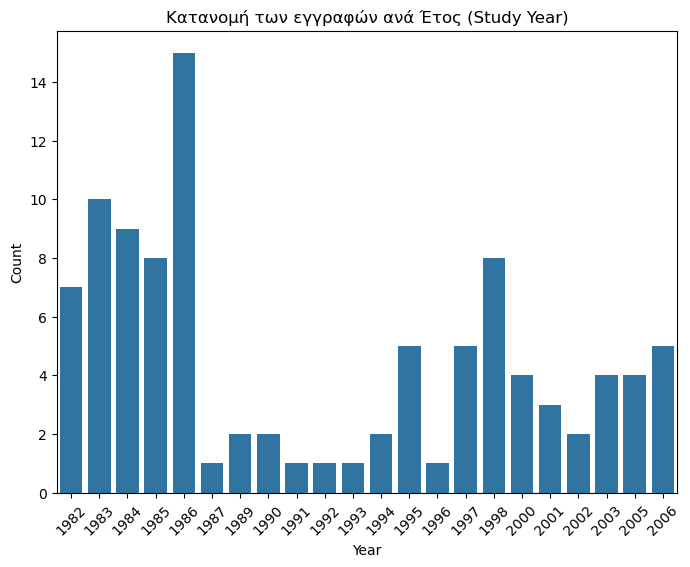

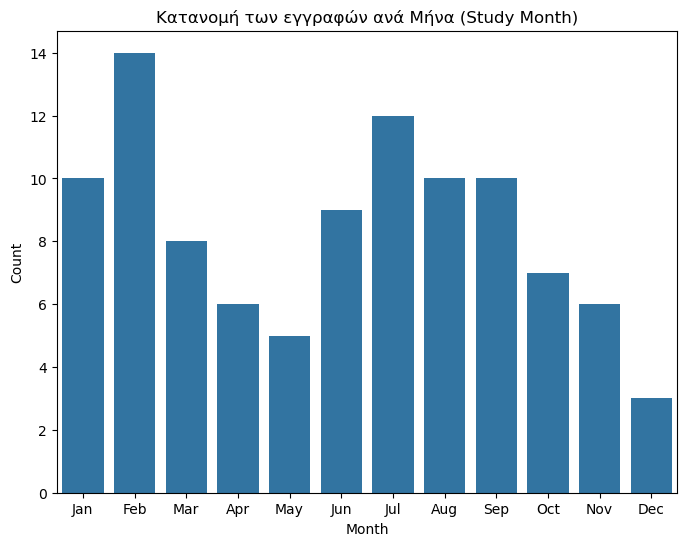

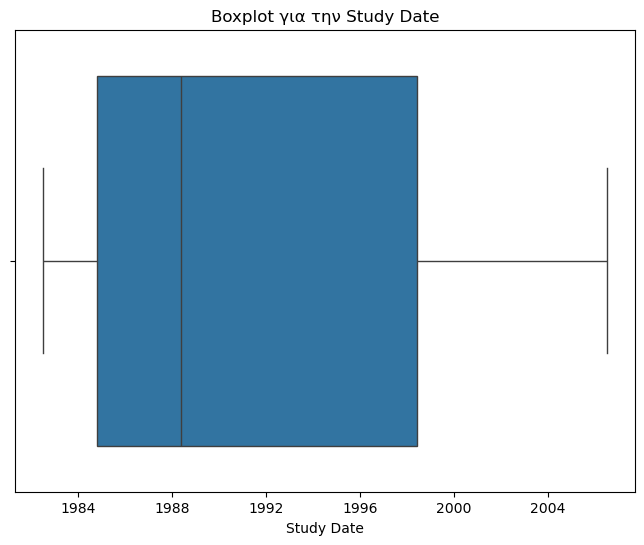

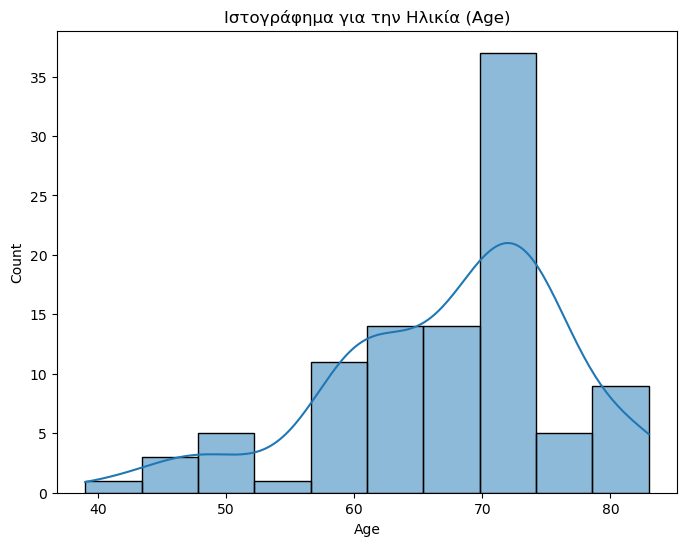

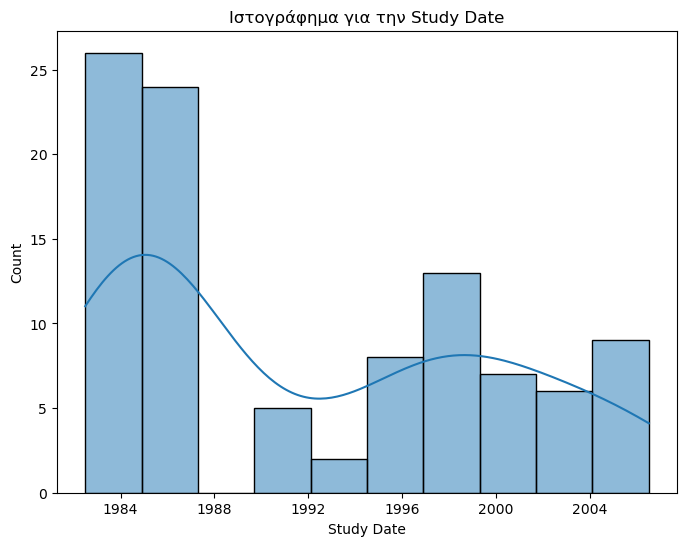

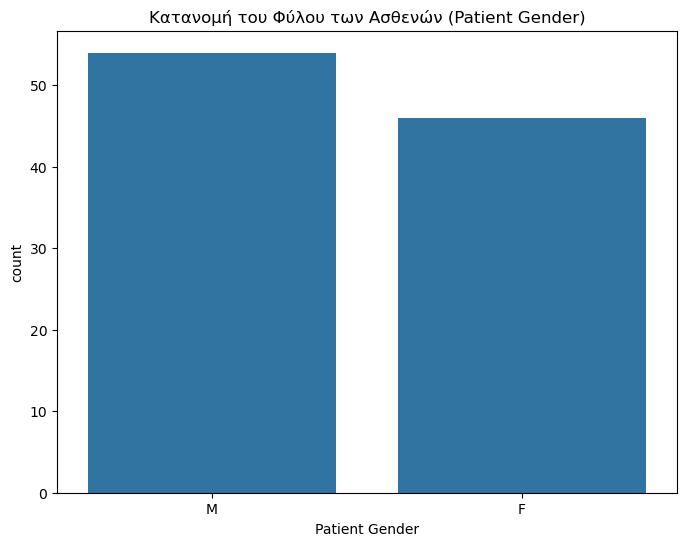

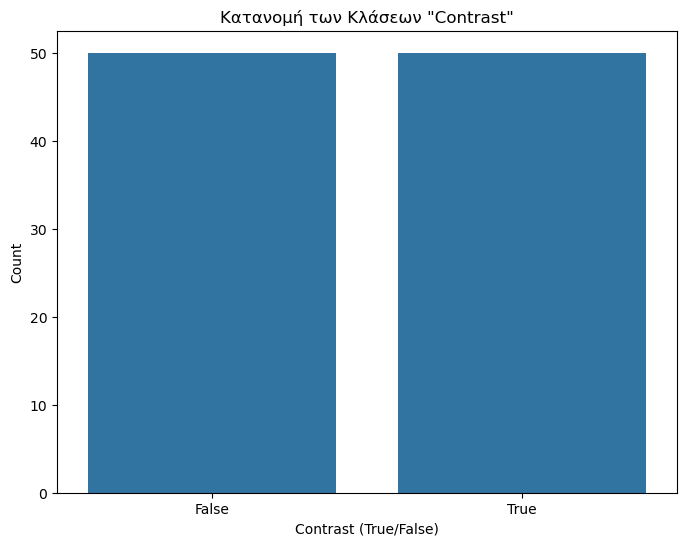


Ανάλυση για το 'ContrastTag':
ContrastTag
NONE                        86
APPLIED                      5
100 ML OPTI 350              2
REDI CAT & 125CC OPTIRAY     1
125CC OPTIRAY                1
&                            1
O                            1
ISOVUE                       1
Name: count, dtype: int64


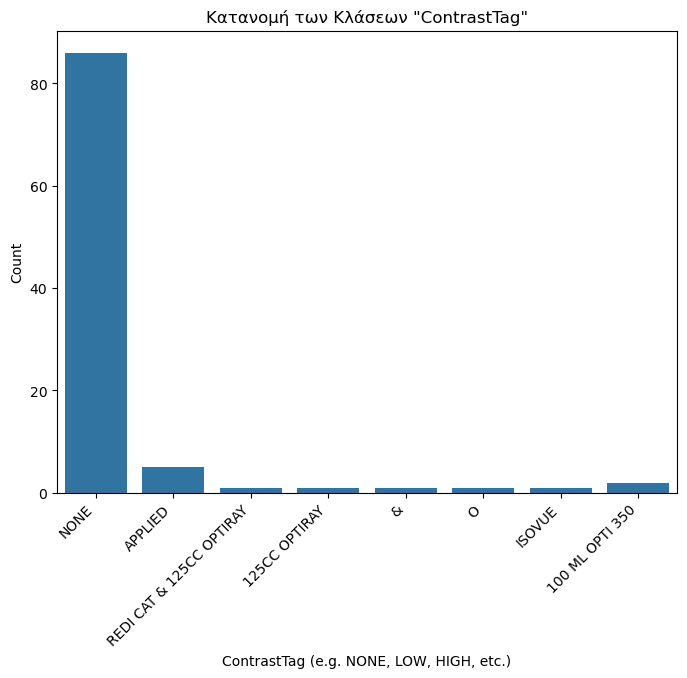


Ανάλυση για το 'Image Type':
Image Type
Grayscale    100
Name: count, dtype: int64


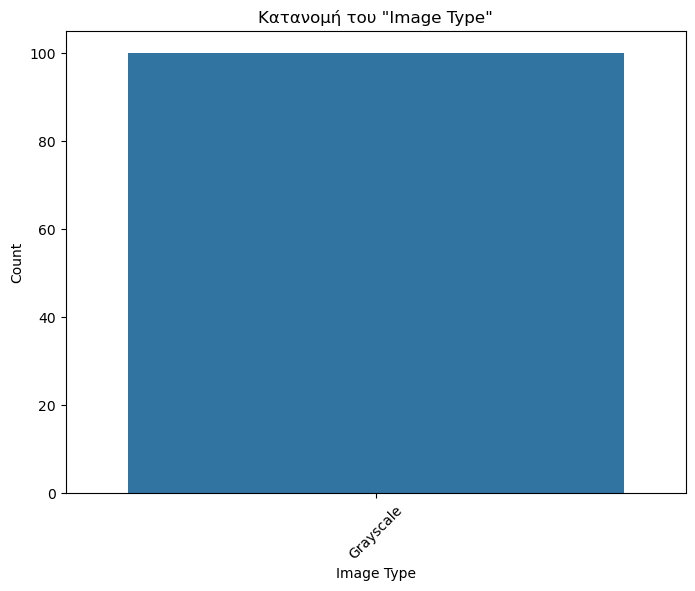

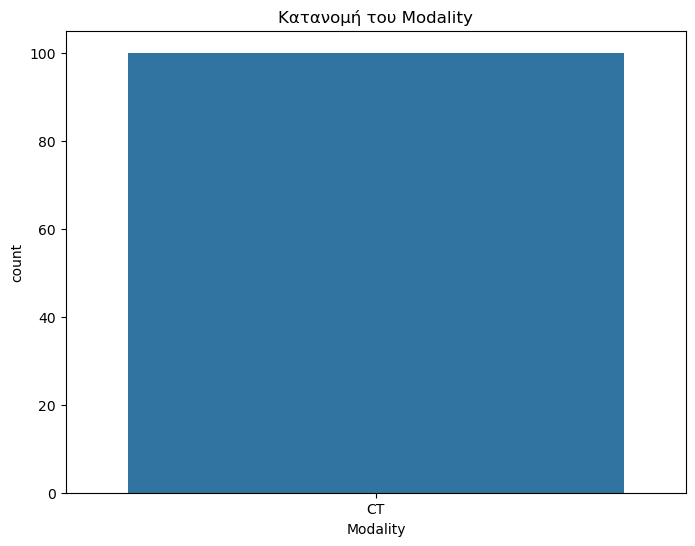

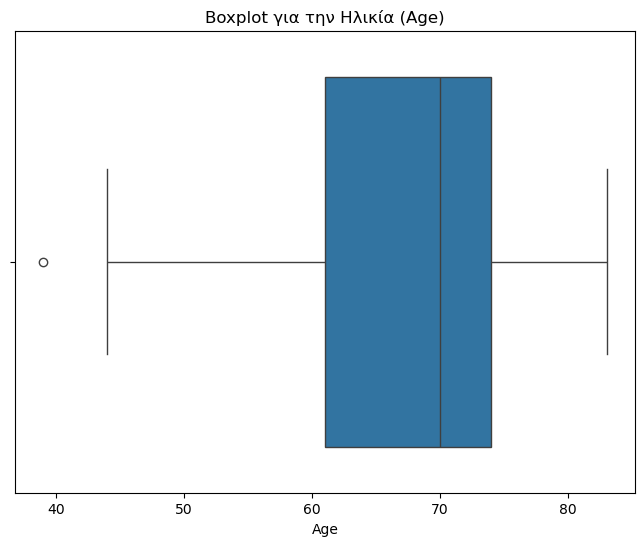


Αριθμός NaN ανά στήλη:
Age               0
Contrast          0
ContrastTag       2
Image Size_x      0
Image Type        0
Pixel Range       0
Is Inverted       0
Is Duplicate      0
Valid Size        0
Modality          0
Patient Gender    0
Study Date        0
Study Year        0
Study Month       0
dtype: int64

Αριθμός αντιγράφων (duplicates) στο DataFrame:
1
Διπλότυπες εγγραφές:
    Age  Contrast      ContrastTag Image Size_x Image Type  \
43   69      True  100 ML OPTI 350   (512, 512)  Grayscale   

                                  Pixel Range  Is Inverted  Is Duplicate  \
43  (np.float64(-3024.0), np.float64(3071.0))         True         False   

    Valid Size Modality Patient Gender Study Date  Study Year  Study Month  
43        True       CT              F 2002-02-18        2002            2  

Αριθμός ακραίων τιμών (outliers) στην Ηλικία: 1

Ακραίες τιμές στην Ηλικία (Age):
31    39
Name: Age, dtype: int64


In [30]:
# Εισαγωγή βιβλιοθηκών
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Φόρτωσε το dataset
eda_df = pd.read_csv('eda_cleaned.csv')

# Στατιστικά για το 'Age'
print("Στατιστική περιγραφή για το Age:")
print(eda_df['Age'].describe())

# Μετατροπή της στήλης 'Study Date' σε μορφή ημερομηνίας (YYYYMMDD)
eda_df['Study Date'] = pd.to_datetime(eda_df['Study Date'].astype(str), format='%Y%m%d')

# Εξαγωγή του έτους από την 'Study Date'
eda_df['Study Year'] = eda_df['Study Date'].dt.year

# Εξαγωγή του μήνα από την 'Study Date'
eda_df['Study Month'] = eda_df['Study Date'].dt.month

# Δες τα πρώτα αποτελέσματα για να επιβεβαιώσεις την εξαγωγή
print(eda_df[['Study Date', 'Study Year', 'Study Month']].head())

# Στατιστικά για κατηγορικές στήλες
print("\nΣτατιστική περιγραφή για κατηγορικές στήλες:")
print(eda_df.describe(include=['object']))  # Για κατηγορικές στήλες (object τύποι)

# 2. Ανάλυση της κατανομής των κλάσεων-στόχων (Contrast)
print("\nΚατανομή των κλάσεων-στόχων (Contrast):")
print(eda_df['Contrast'].value_counts())

# Γράφημα: Κατανομή των εγγραφών ανά έτος
plt.figure(figsize=(8,6))
sns.countplot(x=eda_df['Study Year'])
plt.title('Κατανομή των εγγραφών ανά Έτος (Study Year)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Περιστροφή των ετικετών του άξονα X για καλύτερη εμφάνιση
plt.show()

# Γράφημα: Κατανομή των εγγραφών ανά μήνα
plt.figure(figsize=(8,6))
sns.countplot(x=eda_df['Study Month'])
plt.title('Κατανομή των εγγραφών ανά Μήνα (Study Month)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0, 12, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Boxplot για την Study Date (σε ημερομηνίες)
plt.figure(figsize=(8,6))
sns.boxplot(x=eda_df['Study Date'])
plt.title('Boxplot για την Study Date')
plt.show()

# 5. Ιστογράμματα για την κατανομή της ηλικίας (Age) και της Study Date
# Ιστογράφημα για την Ηλικία (Age)
plt.figure(figsize=(8,6))
sns.histplot(eda_df['Age'], kde=True, bins=10)
plt.title('Ιστογράφημα για την Ηλικία (Age)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Ιστογράφημα για την Study Date
plt.figure(figsize=(8,6))
sns.histplot(eda_df['Study Date'], kde=True, bins=10)
plt.title('Ιστογράφημα για την Study Date')
plt.xlabel('Study Date')
plt.ylabel('Count')
plt.show()

# 7. Κατανομή του φύλου των ασθενών (Patient Gender)
plt.figure(figsize=(8,6))
sns.countplot(x=eda_df['Patient Gender'])
plt.title('Κατανομή του Φύλου των Ασθενών (Patient Gender)')
plt.show()

# Οπτικοποίηση για το "Contrast"
plt.figure(figsize=(8,6))
sns.countplot(x='Contrast', data=eda_df)
plt.title('Κατανομή των Κλάσεων "Contrast"')
plt.ylabel('Count')
plt.xlabel('Contrast (True/False)')
plt.show()

# Ανάλυση για το "ContrastTag"
print("\nΑνάλυση για το 'ContrastTag':")
contrast_tag_counts = eda_df['ContrastTag'].value_counts()
print(contrast_tag_counts)

# Οπτικοποίηση για το "ContrastTag" σε ένα γράφημα
plt.figure(figsize=(8,6))
sns.countplot(x='ContrastTag', data=eda_df)
plt.title('Κατανομή των Κλάσεων "ContrastTag"')
plt.ylabel('Count')
plt.xlabel('ContrastTag (e.g. NONE, LOW, HIGH, etc.)')

# Περιστροφή των ετικετών του άξονα x για καλύτερη αναγνωσιμότητα
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# Κατηγορίες για το "Image Type"
print("\nΑνάλυση για το 'Image Type':")
image_type_counts = eda_df['Image Type'].value_counts()
print(image_type_counts)

# Οπτικοποίηση για το "Image Type"
plt.figure(figsize=(8,6))
sns.countplot(x='Image Type', data=eda_df)
plt.title('Κατανομή του "Image Type"')
plt.ylabel('Count')
plt.xlabel('Image Type')
plt.xticks(rotation=45)
plt.show()

# 8. Κατανομή του Modality
plt.figure(figsize=(8,6))
sns.countplot(x=eda_df['Modality'])
plt.title('Κατανομή του Modality')
plt.show()

# Ελέγχος για ακραίες τιμές (Outliers)
# Boxplot για την Ηλικία (Age)
plt.figure(figsize=(8,6))
sns.boxplot(x=eda_df['Age'])
plt.title('Boxplot για την Ηλικία (Age)')
plt.show()

# 10. Ανάλυση των NaN για κάθε στήλη
print("\nΑριθμός NaN ανά στήλη:")
print(eda_df.isnull().sum())

# 11. Ανάλυση των Duplicate εγγραφών
print("\nΑριθμός αντιγράφων (duplicates) στο DataFrame:")
print(eda_df.duplicated().sum())

# Εντοπισμός διπλοτύπων στο DataFrame
duplicates = eda_df[eda_df.duplicated()]

# Εμφάνιση των διπλοτύπων
print("Διπλότυπες εγγραφές:")
print(duplicates)

# 12. Εξέταση για πιθανές ακραίες τιμές (Outliers)
# Ανάλυση για την ηλικία (Age)
z_scores = np.abs(stats.zscore(eda_df['Age'].dropna()))
outliers = (z_scores > 3)  # Αν οι z-scores είναι πάνω από 3, θεωρούνται outliers
outliers_count = np.sum(outliers)
print(f"\nΑριθμός ακραίων τιμών (outliers) στην Ηλικία: {outliers_count}")

# Καταγραφή των outliers
if outliers_count > 0:
    outliers_data = eda_df['Age'][outliers]
    print("\nΑκραίες τιμές στην Ηλικία (Age):")
    print(outliers_data)
else:
    print("\nΔεν βρέθηκαν ακραίες τιμές στην Ηλικία.")


Γραμμές με ελλείπουσες τιμές για 'ContrastTag':
    Age  Contrast ContrastTag Image Size_x Image Type  \
8    51      True         NaN   (512, 512)  Grayscale   
25   74      True         NaN   (512, 512)  Grayscale   

                                  Pixel Range  Is Inverted  Is Duplicate  \
8   (np.float64(-3024.0), np.float64(1404.0))         True         False   
25  (np.float64(-3024.0), np.float64(1259.0))         True         False   

    Valid Size Modality Patient Gender Study Date  Study Year  Study Month  
8         True       CT              M 1997-03-20        1997            3  
25        True       CT              M 1998-04-21        1998            4  


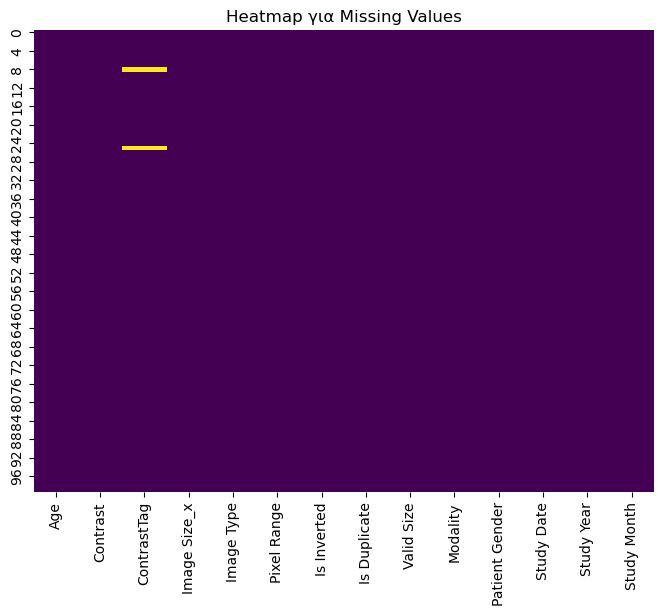

In [ ]:
# Εντοπισμός γραμμών με ελλείπουσες τιμές στην στήλη "ContrastTag"
missing_contrasttag = eda_df[eda_df['ContrastTag'].isna()]

# Εμφάνιση των γραμμών με NaN στην στήλη "ContrastTag"
print("Γραμμές με ελλείπουσες τιμές για 'ContrastTag':")
print(missing_contrasttag)

# Heatmap για Missing Values
plt.figure(figsize=(8,6))
sns.heatmap(eda_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap για Missing Values')
plt.show()


Γραμμές με ελλείπουσες τιμές για 'ContrastTag':
    Age  Contrast ContrastTag Image Size_x Image Type  \
8    51      True         NaN   (512, 512)  Grayscale   
25   74      True         NaN   (512, 512)  Grayscale   

                                  Pixel Range  Is Inverted  Is Duplicate  \
8   (np.float64(-3024.0), np.float64(1404.0))         True         False   
25  (np.float64(-3024.0), np.float64(1259.0))         True         False   

    Valid Size Modality Patient Gender  Study Date  
8         True       CT              M    19970320  
25        True       CT              M    19980421  


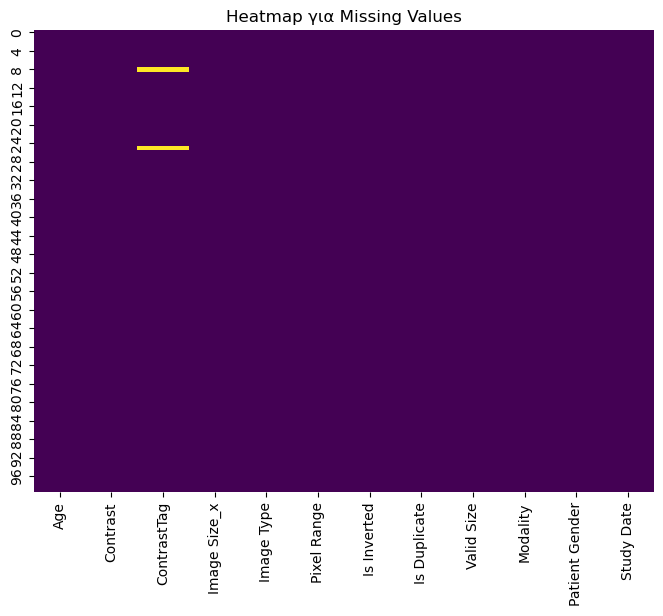


Κατανομή τιμών στη στήλη 'ContrastTag':
ContrastTag
NONE                        86
APPLIED                      5
100 ML OPTI 350              2
REDI CAT & 125CC OPTIRAY     1
125CC OPTIRAY                1
&                            1
O                            1
ISOVUE                       1
Name: count, dtype: int64

Συσχέτιση των missing τιμών με τις αριθμητικές στήλες:
            Age  Study Date
Age         1.0         1.0
Study Date  1.0         1.0

Συσχέτιση των missing τιμών με τις αριθμητικές στήλες (με κωδικοποιημένο 'ContrastTag'):
            Age  Study Date
Age         1.0         1.0
Study Date  1.0         1.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Φόρτωσε το dataset
eda_df = pd.read_csv('eda_cleaned.csv')

# Ελέγχουμε τις missing τιμές στη στήλη "ContrastTag"
missing_contrasttag = eda_df[eda_df['ContrastTag'].isna()]
print("Γραμμές με ελλείπουσες τιμές για 'ContrastTag':")
print(missing_contrasttag)

# Οπτικοποίηση των Missing Values
plt.figure(figsize=(8, 6))
sns.heatmap(eda_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap για Missing Values')
plt.show()

# Ανάλυση της κατανομής τιμών στη στήλη 'ContrastTag'
print("\nΚατανομή τιμών στη στήλη 'ContrastTag':")
print(eda_df['ContrastTag'].value_counts())

# Φιλτράρουμε μόνο τις αριθμητικές στήλες για να υπολογίσουμε τη συσχέτιση
numeric_columns = eda_df.select_dtypes(include=[np.number]).columns

# Υπολογισμός της συσχέτισης των missing τιμών για τις αριθμητικές στήλες
missing_contrasttag_corr = eda_df[numeric_columns].loc[eda_df['ContrastTag'].isna()].corr()
print("\nΣυσχέτιση των missing τιμών με τις αριθμητικές στήλες:")
print(missing_contrasttag_corr)

# Κωδικοποίηση της στήλης 'ContrastTag' σε αριθμητικές τιμές (π.χ. NONE = 0, APPLIED = 1)
eda_df['ContrastTag_encoded'] = eda_df['ContrastTag'].map({'NONE': 0, 'APPLIED': 1, 'OTHER': 2, np.nan: -1})

# Επαναλαμβάνουμε τη διαδικασία της συσχέτισης με τις κωδικοποιημένες τιμές
missing_contrasttag_corr_encoded = eda_df[numeric_columns].loc[eda_df['ContrastTag_encoded'] == -1].corr()
print("\nΣυσχέτιση των missing τιμών με τις αριθμητικές στήλες (με κωδικοποιημένο 'ContrastTag'):")
print(missing_contrasttag_corr_encoded)



Κατανομή πριν την αντικατάσταση των missing τιμών:
ContrastTag
NONE                        86
APPLIED                      5
100 ML OPTI 350              2
REDI CAT & 125CC OPTIRAY     1
125CC OPTIRAY                1
&                            1
O                            1
ISOVUE                       1
Name: count, dtype: int64

Κατανομή μετά την αντικατάσταση των missing τιμών:
ContrastTag
NONE                        88
APPLIED                      5
100 ML OPTI 350              2
REDI CAT & 125CC OPTIRAY     1
125CC OPTIRAY                1
&                            1
O                            1
ISOVUE                       1
Name: count, dtype: int64


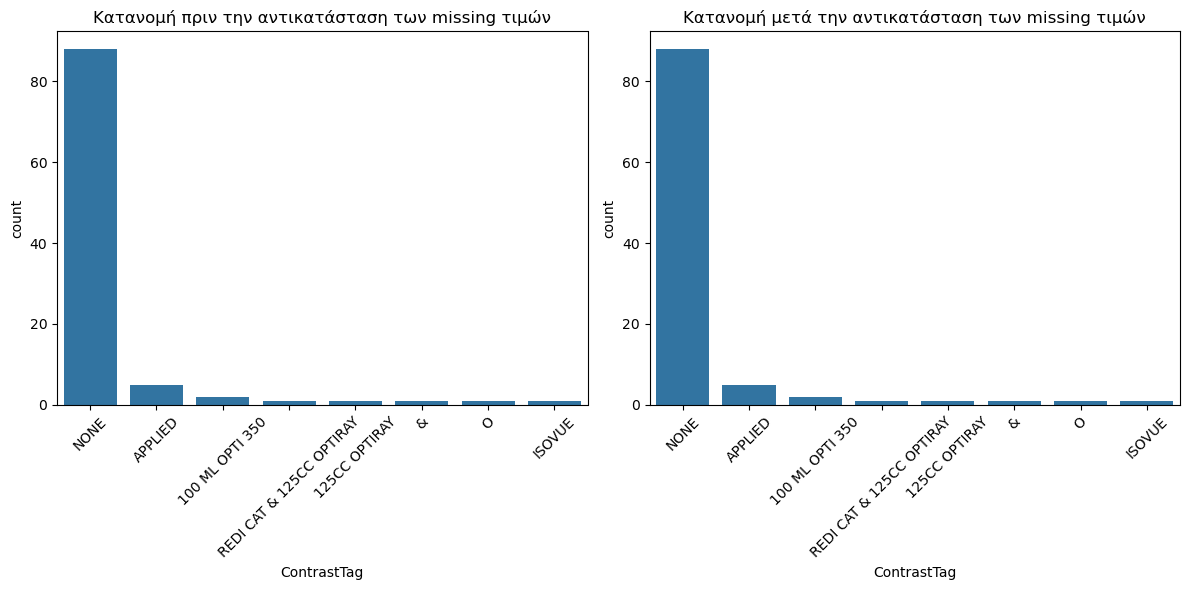


Μέση τιμή ηλικίας: 67.48

Κατανομή ηλικιών μετά την αντικατάσταση της ακραίας τιμής:
count    100.00000
mean      67.76480
std        8.81673
min       44.00000
25%       61.00000
50%       70.00000
75%       74.00000
max       83.00000
Name: Age, dtype: float64


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Φόρτωσε το dataset
eda_df = pd.read_csv('eda_cleaned.csv')

# Εκτύπωση της κατανομής πριν την αντικατάσταση των missing τιμών
print("\nΚατανομή πριν την αντικατάσταση των missing τιμών:")
print(eda_df['ContrastTag'].dropna().value_counts())

# Αντικατάσταση των missing τιμών στη στήλη 'ContrastTag' με την επικρατούσα τιμή
eda_df['ContrastTag'] = eda_df['ContrastTag'].fillna(eda_df['ContrastTag'].mode()[0])

# Εκτύπωση της κατανομής μετά την αντικατάσταση
print("\nΚατανομή μετά την αντικατάσταση των missing τιμών:")
print(eda_df['ContrastTag'].value_counts())

# Εμφάνιση της κατανομής της στήλης 'ContrastTag' πριν και μετά την αντικατάσταση των missing τιμών
plt.figure(figsize=(12, 6))

# Κατανομή πριν την αντικατάσταση (μόνο οι μη missing τιμές)
plt.subplot(1, 2, 1)
sns.countplot(x='ContrastTag', data=eda_df, order=eda_df['ContrastTag'].dropna().value_counts().index)
plt.title('Κατανομή πριν την αντικατάσταση των missing τιμών')

# Περιστροφή των ετικετών στον οριζόντιο άξονα
plt.xticks(rotation=45)

# Κατανομή μετά την αντικατάσταση (όλες οι τιμές)
plt.subplot(1, 2, 2)
sns.countplot(x='ContrastTag', data=eda_df, order=eda_df['ContrastTag'].value_counts().index)
plt.title('Κατανομή μετά την αντικατάσταση των missing τιμών')

# Περιστροφή των ετικετών στον οριζόντιο άξονα
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Αντικατάσταση της ακραίας τιμής στην ηλικία με τη μέση τιμή
mean_age = eda_df['Age'].mean()
eda_df['Age'] = eda_df['Age'].replace(39, mean_age)

# Εκτύπωση της μέσης τιμής και της κατανομής της ηλικίας μετά την αντικατάσταση της ακραίας τιμής
print("\nΜέση τιμή ηλικίας:", mean_age)
print("\nΚατανομή ηλικιών μετά την αντικατάσταση της ακραίας τιμής:")
print(eda_df['Age'].describe())

# Αποθήκευση των αλλαγών σε νέο αρχείο
eda_df.to_csv('eda_cleaned_updated.csv', index=False)




Ποσοστά για το 'Pixel Range':
Pixel Range
(np.float64(-1024.0), np.float64(3071.0))    7.0
(np.float64(-2048.0), np.float64(3071.0))    6.0
(np.float64(-3024.0), np.float64(3071.0))    4.0
(np.float64(-1024.0), np.float64(1204.0))    2.0
(np.float64(-1024.0), np.float64(1924.0))    2.0
                                            ... 
(np.float64(-2048.0), np.float64(1285.0))    1.0
(np.float64(-1024.0), np.float64(1356.0))    1.0
(np.float64(-2048.0), np.float64(1372.0))    1.0
(np.float64(-2048.0), np.float64(1163.0))    1.0
(np.float64(-1024.0), np.float64(1309.0))    1.0
Name: count, Length: 80, dtype: float64


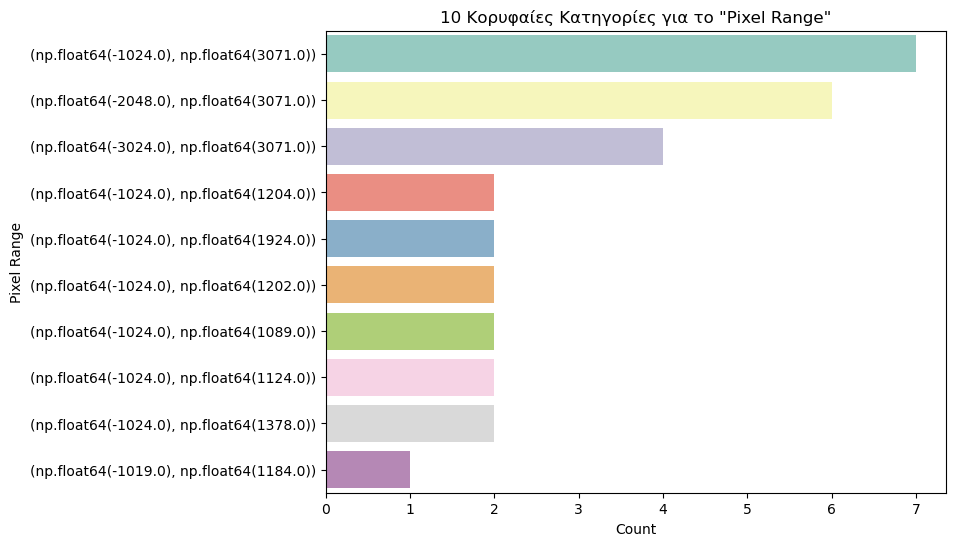


Ποσοστά για το 'Image Size_x':
Image Size_x
(512, 512)    100.0
Name: count, dtype: float64


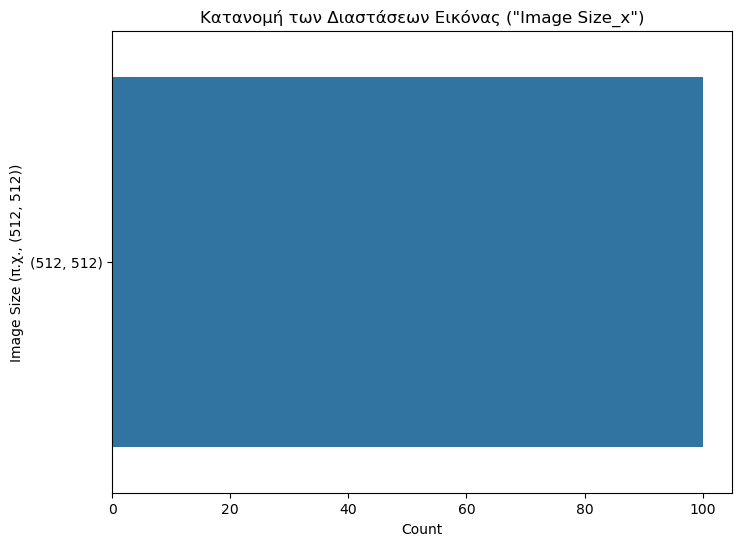

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Φόρτωμα του dataset
eda_df = pd.read_csv('eda_cleaned_updated.csv')

# Ανάλυση 'Pixel Range'
print("\nΠοσοστά για το 'Pixel Range':")
pixel_range_counts = eda_df['Pixel Range'].value_counts()

# Υπολογισμός ποσοστών
pixel_range_percentages = pixel_range_counts / len(eda_df) * 100
print(pixel_range_percentages)

# Οπτικοποίηση με Bar plot για το 'Pixel Range'
top_10_pixel_range = pixel_range_counts.head(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_10_pixel_range.index, x=top_10_pixel_range.values, palette='Set3', hue=top_10_pixel_range.index)
plt.title('10 Κορυφαίες Κατηγορίες για το "Pixel Range"')
plt.xlabel('Count')
plt.ylabel('Pixel Range')
plt.show()

# Ανάλυση Διαστάσεων Εικόνας ('Image Size_x')
print("\nΠοσοστά για το 'Image Size_x':")
image_size_counts = eda_df['Image Size_x'].value_counts()

# Υπολογισμός ποσοστών για 'Image Size_x'
image_size_percentages = image_size_counts / len(eda_df) * 100
print(image_size_percentages)

# Οπτικοποίηση με Count plot για το 'Image Size_x'
plt.figure(figsize=(8, 6))
sns.countplot(y='Image Size_x', data=eda_df, order=eda_df['Image Size_x'].value_counts().index)
plt.title('Κατανομή των Διαστάσεων Εικόνας ("Image Size_x")')
plt.xlabel('Count')
plt.ylabel('Image Size (π.χ., (512, 512))')
plt.show()


In [38]:
import numpy as np

# Φόρτωσε το αρχείο full_archive.npz με allow_pickle=True
data = np.load('full_archive.npz', allow_pickle=True)

# Ανάκτηση των εικόνων και του index
images = data['image']
indices = data['idx']

# Επιλέγουμε τις εικόνες από το index 0 έως το 99 (100 εικόνες με metadata)
images_100_with_metadata = images[:100]
indices_100_with_metadata = indices[:100]

# Δημιουργία νέου αρχείου npz με τις 100 εικόνες και τα metadata
np.savez('images_100_with_metadata.npz', image=images_100_with_metadata, idx=indices_100_with_metadata)

print("Το αρχείο images_100_with_metadata.npz δημιουργήθηκε με επιτυχία.")

Το αρχείο images_100_with_metadata.npz δημιουργήθηκε με επιτυχία.


Σχήμα των δεδομένων εικόνας: (100,)
Σχήμα των δεδομένων index: (100,)


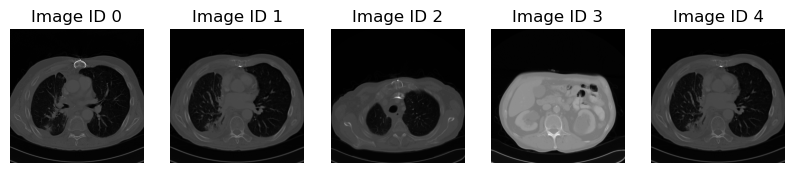

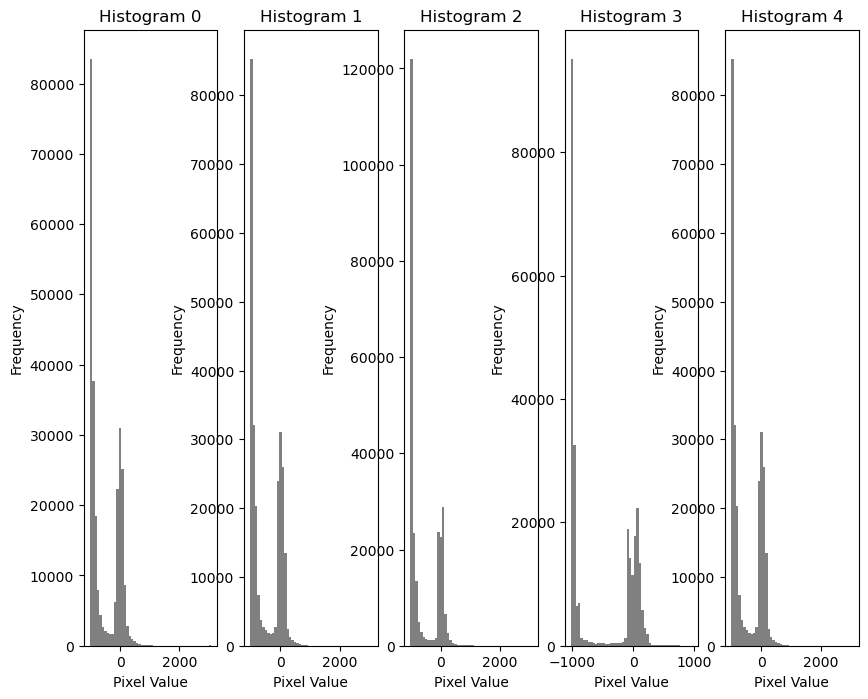

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Φόρτωση του αρχείου images_375_no_metadata.npz
data_375 = np.load('images_100_with_metadata.npz', allow_pickle=True)

# 2. Ανάκτηση των εικόνων και των index
images_375 = data_375['image']
indices_375 = data_375['idx']

# 3. Έλεγχος των πρώτων 5 εικόνων και εκτύπωση του σχήματος των δεδομένων
print(f"Σχήμα των δεδομένων εικόνας: {images_375.shape}")
print(f"Σχήμα των δεδομένων index: {indices_375.shape}")

# 4. Εμφάνιση 5 πρώτων εικόνων
plt.figure(figsize=(10, 8))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_375[i], cmap='gray')
    plt.title(f"Image ID {indices_375[i]}")
    plt.axis('off')

plt.show()

# 5. Ιστογράφημα των pixel values για τις πρώτες 5 εικόνες
plt.figure(figsize=(10, 8))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.hist(images_375[i].ravel(), bins=50, color='gray')
    plt.title(f'Histogram {indices_375[i]}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()


Κλειδιά στο npz αρχείο: ['image', 'idx']
Σχήμα των εικόνων: (100,)
Σχήμα των indices: (100,)
Στατιστικά για τις πρώτες 5 εικόνες:
Εικόνα 0: min=-1024.0, max=3071.0, mean=-539.4666175842285, std=481.3959259812921
Εικόνα 1: min=-1024.0, max=3071.0, mean=-528.5691261291504, std=476.25691705667856
Εικόνα 2: min=-1024.0, max=3071.0, mean=-604.6977996826172, std=479.0198322470745
Εικόνα 3: min=-1024.0, max=963.0, mean=-539.2980728149414, std=501.38088575397
Εικόνα 4: min=-1024.0, max=3071.0, mean=-528.5691261291504, std=476.25691705667856


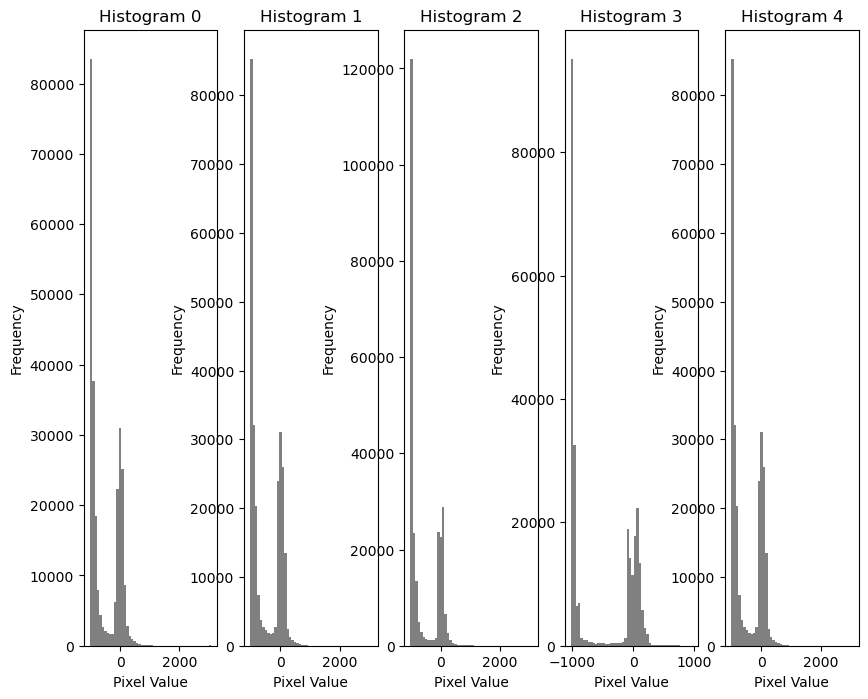

Αριθμός outliers για κάθε εικόνα: [np.int64(190), np.int64(36), np.int64(122), np.int64(0), np.int64(36), np.int64(190), np.int64(38), np.int64(0), np.int64(94), np.int64(0), np.int64(72), np.int64(3), np.int64(37), np.int64(739), np.int64(0), np.int64(5), np.int64(0), np.int64(67), np.int64(15), np.int64(239), np.int64(0), np.int64(317), np.int64(0), np.int64(20), np.int64(0), np.int64(22), np.int64(0), np.int64(37), np.int64(0), np.int64(0), np.int64(0), np.int64(4), np.int64(0), np.int64(0), np.int64(0), np.int64(3), np.int64(0), np.int64(22), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(7), np.int64(3), np.int64(195), np.int64(5), np.int64(278), np.int64(21), np.int64(40), np.int64(165), np.int64(35), np.int64(113), np.int64(73), np.int64(60), np.int64(41), np.int64(226), np.int64(6), np.int64(33), np.int64(7), np.int64(79), np.int64(0), np.int64(26), np.int64(37), np.int64(0), np.int64(0), np.int64(0), np.int64(305), np.int64(3379), np.int64(0), np.int

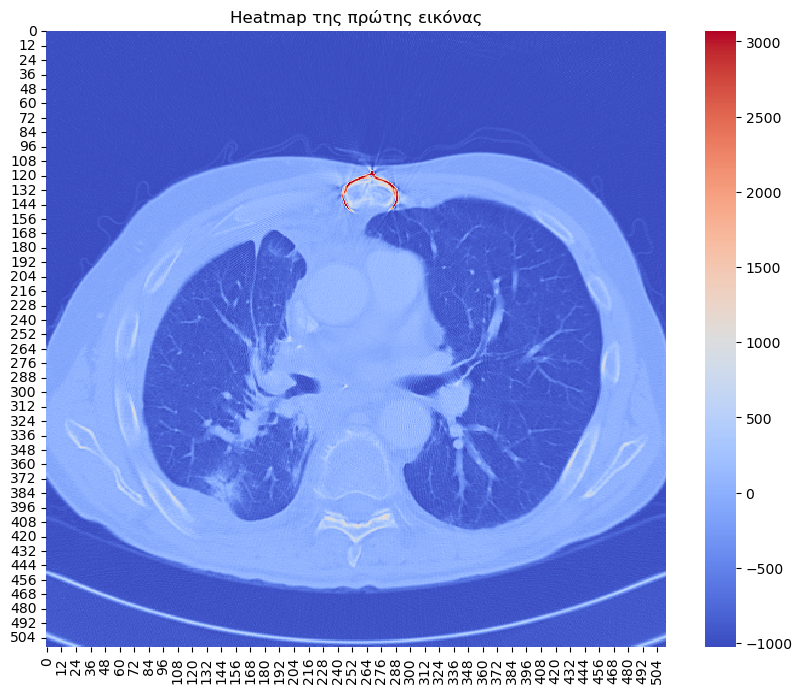

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Φόρτωσε τα δεδομένα
data = np.load('images_100_with_metadata.npz',  allow_pickle=True)

# Εμφάνιση των διαθέσιμων κλειδιών στο npz αρχείο
print("Κλειδιά στο npz αρχείο:", data.files)

# Ανάκτηση των εικόνων και των indices
images_100 = data['image']
indices_100 = data['idx']

# Σχήμα των δεδομένων
print("Σχήμα των εικόνων:", images_100.shape)  # Αναμενόμενο (100, 512, 512)
print("Σχήμα των indices:", indices_100.shape)  # Αναμενόμενο (100,)

# Στατιστική περιγραφή των πρώτων 5 εικόνων
print("Στατιστικά για τις πρώτες 5 εικόνες:")
for i in range(5):
    print(f"Εικόνα {i}: min={np.min(images_100[i])}, max={np.max(images_100[i])}, mean={np.mean(images_100[i])}, std={np.std(images_100[i])}")

# Ιστογράφημα των pixel values για τις πρώτες 5 εικόνες
plt.figure(figsize=(10, 8))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.hist(images_375[i].ravel(), bins=50, color='gray')
    plt.title(f'Histogram {indices_375[i]}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()

# Ελέγξτε για ακραίες τιμές (outliers) στις εικόνες
# Υπολογίζουμε τα παρακάτω για κάθε εικόνα
outliers = []
for i in range(images_100.shape[0]):
    img = images_100[i].ravel()
    q75, q25 = np.percentile(img, [75 ,25])
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    outliers.append(((img < lower_bound) | (img > upper_bound)).sum())  # Αριθμός outliers ανά εικόνα

# Εκτύπωση των αριθμών των outliers για κάθε εικόνα
print(f'Αριθμός outliers για κάθε εικόνα: {outliers}')

# Οπτικοποίηση των outliers (π.χ., σε ένα heatmap ή κάποιο άλλο γράφημα)
plt.figure(figsize=(10, 8))
sns.heatmap(images_100[0], annot=False, cmap='coolwarm')  # Πρώτη εικόνα ως παράδειγμα
plt.title('Heatmap της πρώτης εικόνας')
plt.show()


Missing values pixel per picture:
 0    0
dtype: int64


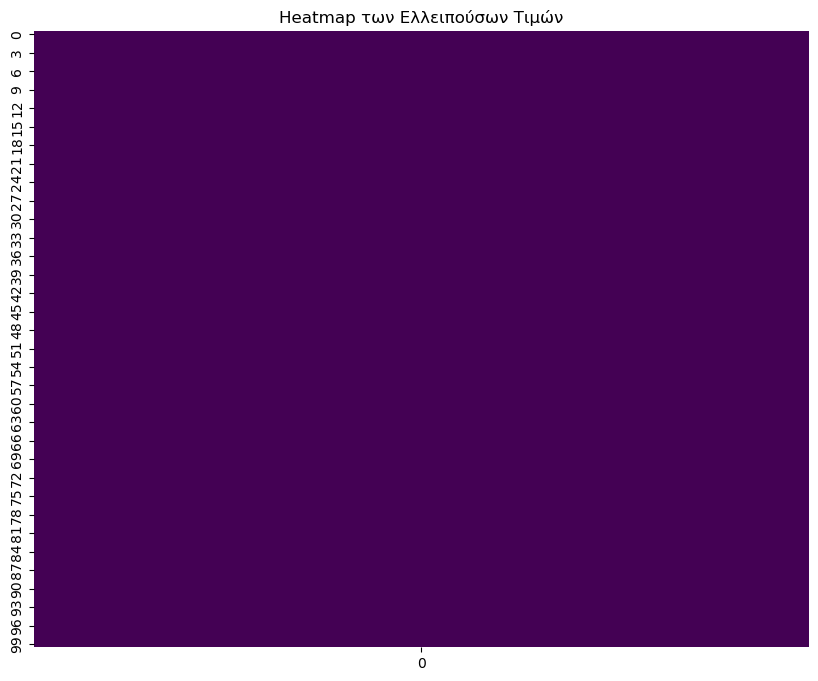

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Μετατροπή των εικόνων σε DataFrame για ευκολότερη επεξεργασία
# Εδώ θα δημιουργήσουμε έναν πίνακα από τις εικόνες που περιέχουν τα pixel ως χαρακτηριστικά
df = pd.DataFrame(images_100.reshape(100, -1))  # Αναδομεί τις εικόνες σε ένα πίνακα (100 εικόνες x αριθμός pixels)

# Ελέγχουμε για Missing Values
missing_values = df.isnull().sum()  # Ο αριθμός των ελλειπουσών τιμών ανά στήλη
print("Missing values pixel per picture:\n", missing_values)

# Οπτικοποίηση των Missing Values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap των Ελλειπούσων Τιμών')
plt.show()


Οι 100 εικόνες με τα metadata κανονικοποιήθηκαν και αποθηκεύτηκαν στο 'images_100_normalized_with_metadata.npz'.


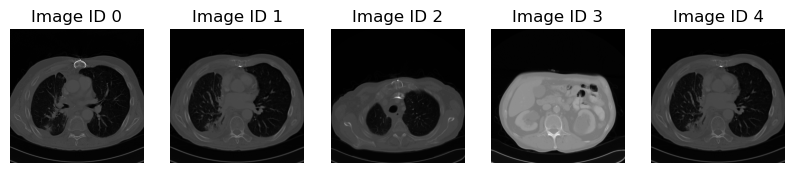

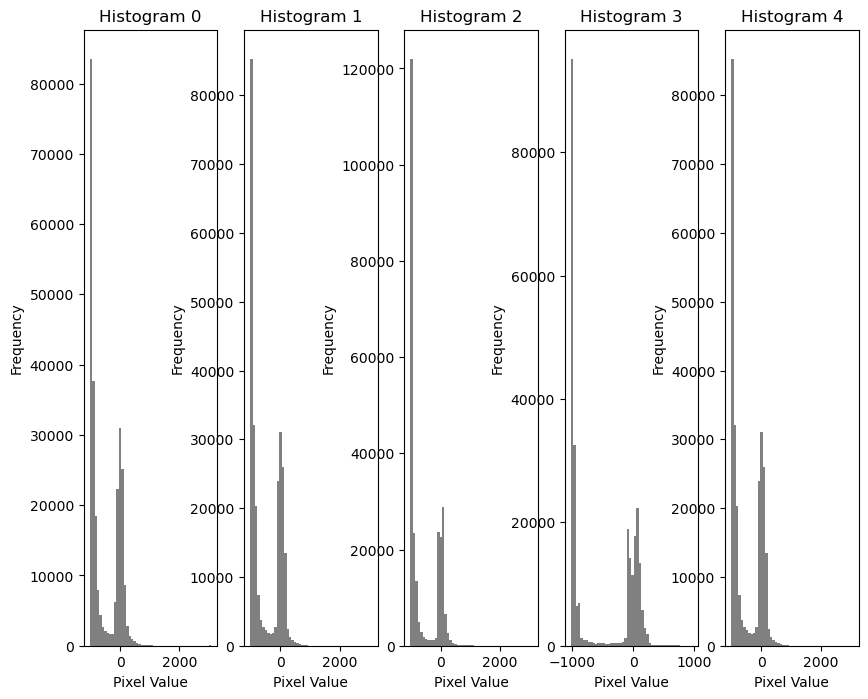

In [ ]:
import numpy as np

# Φόρτωμα του αρχείου με τις 100 εικόνες που περιέχουν metadata
data_100 = np.load('images_100_with_metadata.npz', allow_pickle=True)
images_100 = data_100['image']  # Εικόνες
indices_100 = data_100['idx']  # Δείκτες (εάν είναι απαραίτητο για metadata)

# Κανονικοποίηση των εικόνων
images_100_normalized = []
for image in images_100:
    # Κανονικοποίηση στο εύρος [0, 255]
    image_normalized = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    image_normalized = image_normalized.astype(np.uint8)  # Μετατροπή σε ακέραιους για εικόνες
    images_100_normalized.append(image_normalized)

# Μετατροπή σε numpy array
images_100_normalized = np.array(images_100_normalized)

# Αποθήκευση του αρχείου npz με τις κανονικοποιημένες εικόνες
np.savez('images_100_normalized_with_metadata.npz', image=images_100_normalized, idx=indices_100)

print("Οι 100 εικόνες με τα metadata κανονικοποιήθηκαν και αποθηκεύτηκαν στο 'images_100_normalized_with_metadata.npz'.")

# Εμφάνιση 5 πρώτων εικόνων
plt.figure(figsize=(10, 8))




Κλειδιά στο npz αρχείο: ['image', 'idx']
Σχήμα των κανονικοποιημένων εικόνων: (100, 512, 512)
Σχήμα των indices: (100,)
Πρώτες 5 εικόνες: [[[  3   1   0 ...   1   2   1]
  [  2   2   0 ...   3   0   0]
  [  3   0   0 ...   0   5   3]
  ...
  [  0   3   5 ...   0   2   1]
  [  4   5   0 ...   3   0   2]
  [  1   1   0 ...   8   3   1]]

 [[  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  ...
  [  0   0   0 ...   3   1   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  3   2   2 ...   3   3   1]
  [  1   2   2 ...   1   2   4]
  [  3   3   3 ...   2   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [153 159 155 ...   3   4   3]
  [114 138 154 ...   5   4   5]
  [ 55  80 110 ...   7   7   6]]

 [[  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1

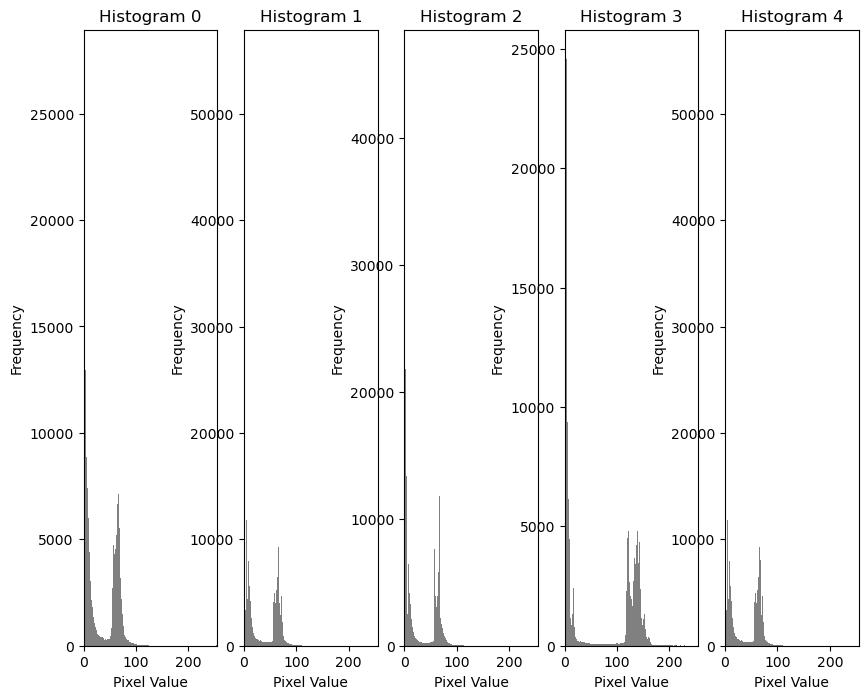

Image 0 - min: 0, max: 255, mean: 29.70046615600586
Image 1 - min: 0, max: 255, mean: 30.34781265258789
Image 2 - min: 0, max: 255, mean: 25.636825561523438
Image 3 - min: 0, max: 255, mean: 61.7315673828125
Image 4 - min: 0, max: 255, mean: 30.34781265258789


In [45]:
import numpy as np

# Άνοιγμα του αρχείου images_100_normalized_with_metadata.npz
data = np.load('images_100_normalized_with_metadata.npz')

# Εμφάνιση των διαθέσιμων κλειδιών (keys) στο npz αρχείο
print("Κλειδιά στο npz αρχείο:", data.files)

# Ανάκτηση των εικόνων και των indices
images_100_normalized = data['image']
indices_100 = data['idx']

# Έλεγχος των πρώτων εικόνων και των πρώτων 5 δείκτες
print("Σχήμα των κανονικοποιημένων εικόνων:", images_100_normalized.shape)
print("Σχήμα των indices:", indices_100.shape)

# Εκτύπωση των πρώτων 5 εικόνων (τυπικά 2D arrays)
print("Πρώτες 5 εικόνες:", images_100_normalized[:5])

# το ιστορικό των pixel values για τις πρώτες 5 εικόνες
print("Ιστορικά pixel values των πρώτων 5 εικόνων:")
for i in range(5):
    print(f"Εικόνα {indices_100[i]}: min={np.min(images_100_normalized[i])}, max={np.max(images_100_normalized[i])}")

# Δημιουργία ιστογράμματος για τις πρώτες 5 κανονικοποιημένες εικόνες
plt.figure(figsize=(10, 8))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.hist(images_100_normalized[i].ravel(), bins=256, color='gray', range=(0, 255))  # Εύρος bins [0, 255]
    plt.title(f'Histogram {indices_100[i]}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim(0, 255)  # Οριοθέτηση του οριζόντιου άξονα από 0 έως 255 για κανονική εμφάνιση

plt.show()

# Για να δεις την κατανομή των pixel values για τις πρώτες 5 εικόνες
for i in range(5):
    print(f"Image {i} - min: {images_100_normalized[i].min()}, max: {images_100_normalized[i].max()}, mean: {images_100_normalized[i].mean()}")

Στατιστικά για τις πρώτες 5 εικόνες:
Image 0 - Mean: 29.70, Median: 12.00, Std: 29.96, Min: 0, Max: 255
Image 1 - Mean: 30.35, Median: 13.00, Std: 29.67, Min: 0, Max: 255
Image 2 - Mean: 25.64, Median: 7.00, Std: 29.81, Min: 0, Max: 255
Image 3 - Mean: 61.73, Median: 12.00, Std: 64.32, Min: 0, Max: 255
Image 4 - Mean: 30.35, Median: 13.00, Std: 29.67, Min: 0, Max: 255


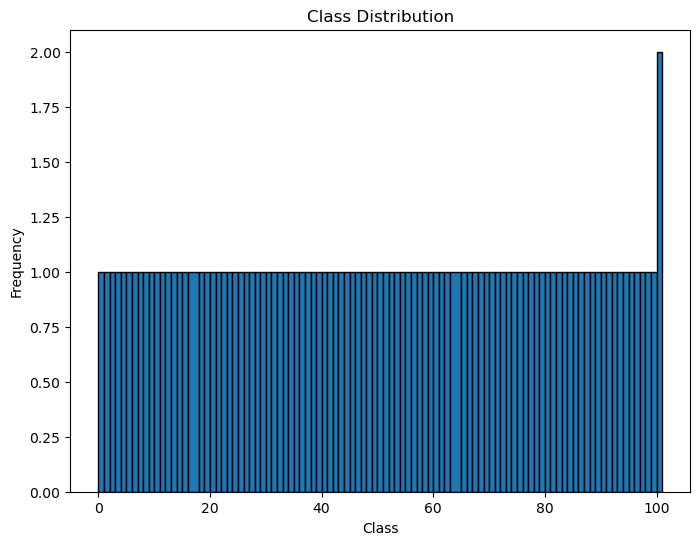

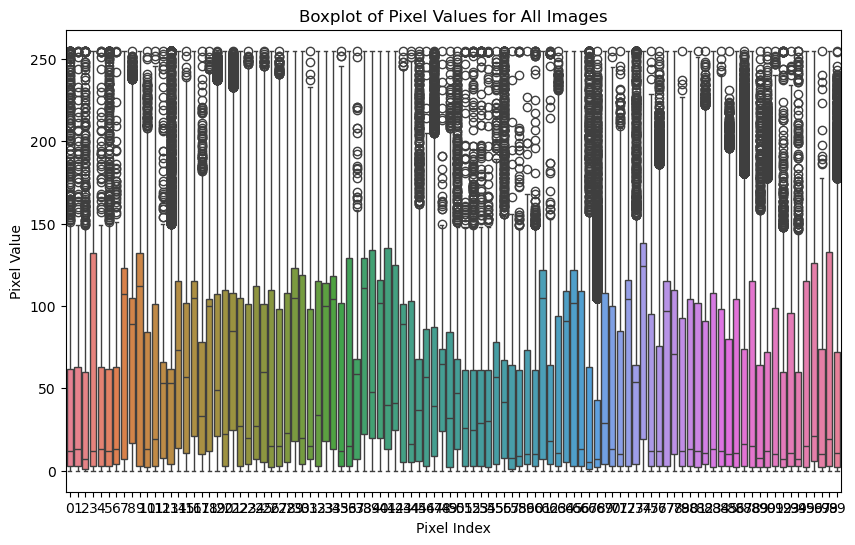

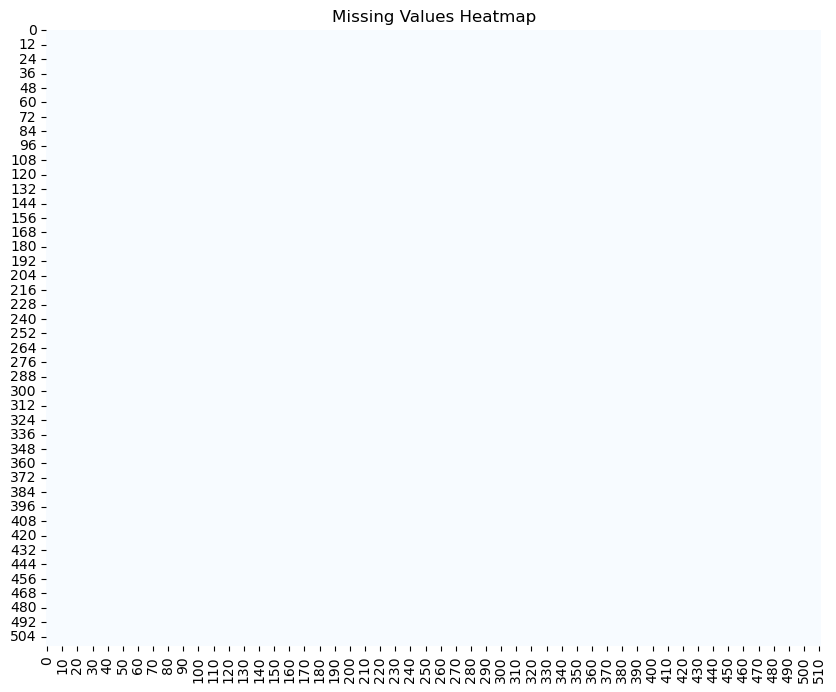

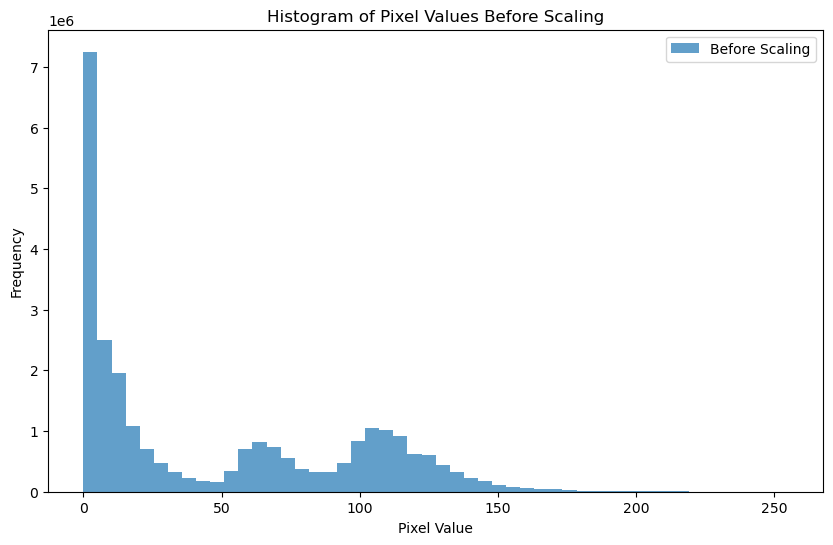

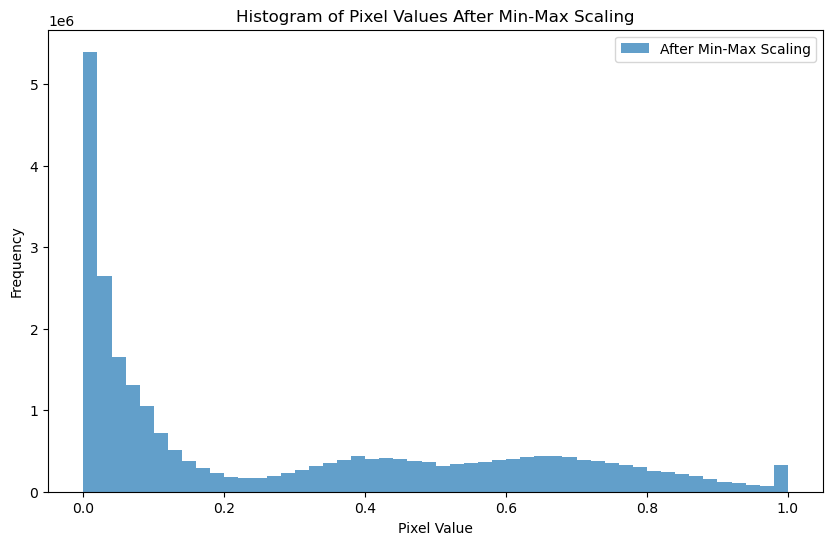

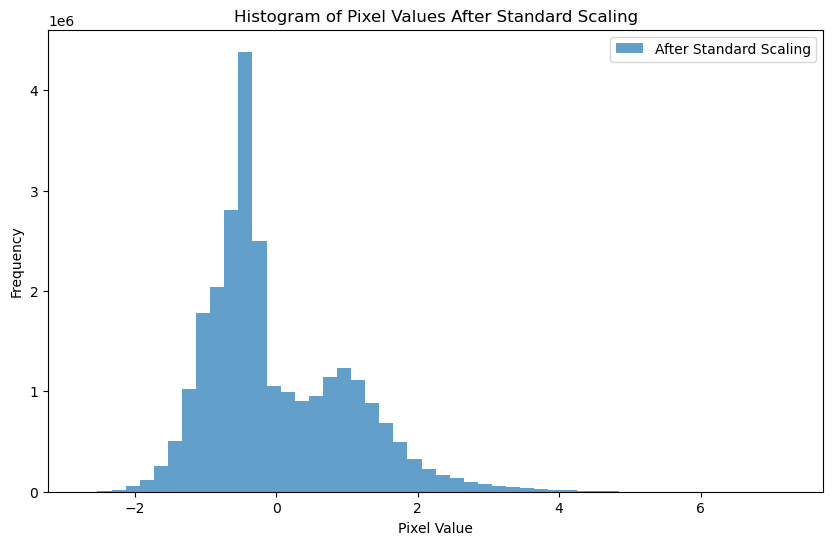

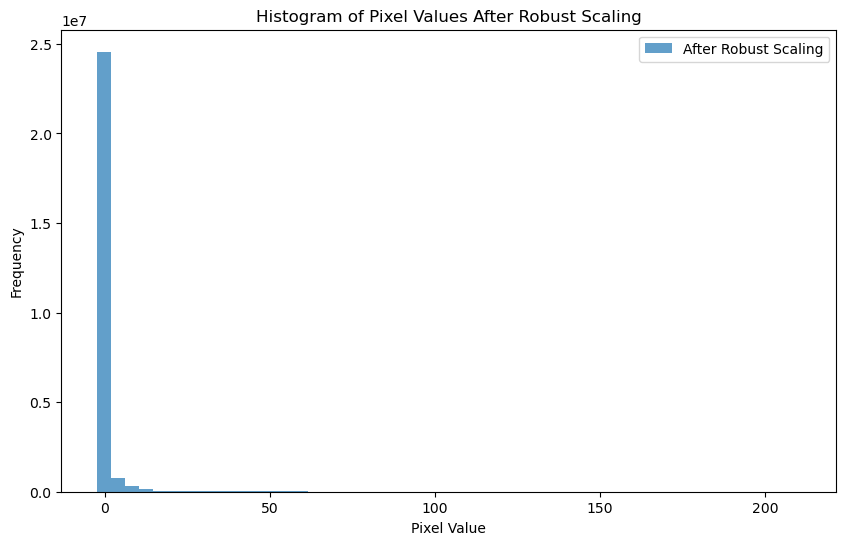

Standard Deviation Before Scaling: 48.87
Standard Deviation After Min-Max Scaling: 0.30
Standard Deviation After Standard Scaling: 1.00
Standard Deviation After Robust Scaling: 5.33


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Φόρτωση των δεδομένων από το npz αρχείο
npz_data = np.load('images_100_normalized_with_metadata.npz')
images_100_normalized = npz_data['image']  # 100 εικόνες με κανονικοποιημένα pixel values
indices_100 = npz_data['idx']  # Αν υπάρχουν labels, αλλιώς αγνοούνται

# Στατιστική περιγραφή των εικόνων
mean_values = np.mean(images_100_normalized, axis=(1, 2))  # Μέση τιμή για κάθε εικόνα
median_values = np.median(images_100_normalized, axis=(1, 2))  # Διάμεσος για κάθε εικόνα
std_values = np.std(images_100_normalized, axis=(1, 2))  # Τυπική απόκλιση για κάθε εικόνα
min_values = np.min(images_100_normalized, axis=(1, 2))  # Ελάχιστο για κάθε εικόνα
max_values = np.max(images_100_normalized, axis=(1, 2))  # Μέγιστο για κάθε εικόνα

# Εκτύπωση στατιστικών για τις πρώτες 5 εικόνες
print("Στατιστικά για τις πρώτες 5 εικόνες:")
for i in range(5):
    print(f"Image {i} - Mean: {mean_values[i]:.2f}, Median: {median_values[i]:.2f}, Std: {std_values[i]:.2f}, Min: {min_values[i]}, Max: {max_values[i]}")

# Ανάλυση κατανομής κλάσεων (Class Distribution) αν υπάρχουν labels (indices_100)
plt.figure(figsize=(8, 6))
plt.hist(indices_100, bins=np.unique(indices_100), edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Έλεγχος για ακραίες τιμές (outliers) μέσω boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=images_100_normalized.reshape(images_100_normalized.shape[0], -1).T)
plt.title('Boxplot of Pixel Values for All Images')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.show()

# Ελέγχουμε για ελλειπούσες τιμές (NaN) και το οπτικοποιούμε με heatmap
missing_values = np.isnan(images_100_normalized)
plt.figure(figsize=(10, 8))
sns.heatmap(missing_values.mean(axis=0).reshape(512, 512), cmap="Blues", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Προεπεξεργασία: Χειρισμός ακραίων τιμών και κανονικοποίηση των pixel values
# 1. Min-Max Scaling
scaler_minmax = MinMaxScaler()
images_100_normalized_minmax = scaler_minmax.fit_transform(images_100_normalized.reshape(-1, 512*512)).reshape(100, 512, 512)

# 2. Standard Scaling
scaler_standard = StandardScaler()
images_100_normalized_standard = scaler_standard.fit_transform(images_100_normalized.reshape(-1, 512*512)).reshape(100, 512, 512)

# 3. Robust Scaling
scaler_robust = RobustScaler()
images_100_normalized_robust = scaler_robust.fit_transform(images_100_normalized.reshape(-1, 512*512)).reshape(100, 512, 512)

# Εμφάνιση σύγκρισης των χαρακτηριστικών πριν και μετά την κλιμάκωση
# Πριν την κλιμάκωση
plt.figure(figsize=(10, 6))
plt.hist(images_100_normalized.reshape(-1), bins=50, alpha=0.7, label='Before Scaling')
plt.legend()
plt.title('Histogram of Pixel Values Before Scaling')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Μετά την κλιμάκωση (Min-Max)
plt.figure(figsize=(10, 6))
plt.hist(images_100_normalized_minmax.reshape(-1), bins=50, alpha=0.7, label='After Min-Max Scaling')
plt.legend()
plt.title('Histogram of Pixel Values After Min-Max Scaling')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Μετά την κλιμάκωση (Standard)
plt.figure(figsize=(10, 6))
plt.hist(images_100_normalized_standard.reshape(-1), bins=50, alpha=0.7, label='After Standard Scaling')
plt.legend()
plt.title('Histogram of Pixel Values After Standard Scaling')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Μετά την κλιμάκωση (Robust)
plt.figure(figsize=(10, 6))
plt.hist(images_100_normalized_robust.reshape(-1), bins=50, alpha=0.7, label='After Robust Scaling')
plt.legend()
plt.title('Histogram of Pixel Values After Robust Scaling')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Συγκρίνουμε τα αποτελέσματα της κλιμάκωσης (με βάση την τυπική απόκλιση πριν και μετά)
print(f"Standard Deviation Before Scaling: {np.std(images_100_normalized):.2f}")
print(f"Standard Deviation After Min-Max Scaling: {np.std(images_100_normalized_minmax):.2f}")
print(f"Standard Deviation After Standard Scaling: {np.std(images_100_normalized_standard):.2f}")
print(f"Standard Deviation After Robust Scaling: {np.std(images_100_normalized_robust):.2f}")



ΓΙΑ ΔΗΜΙΟΥΡΓΙΑ ΑΡΧΕΙΟΥ NPZ ΓΙΑ ΤΙΣ 375 ΕΙΚΟΝΕΣ

In [32]:
import numpy as np

# Φόρτωσε το αρχείο full_archive.npz με allow_pickle=True
data = np.load('full_archive.npz', allow_pickle=True)

# Ανάκτηση των εικόνων και του index
images = data['image']
indices = data['idx']

# Επιλέγουμε τις εικόνες από το index 100 και μετά (375 εικόνες χωρίς metadata)
images_375 = images[100:]
indices_375 = indices[100:]

# Δημιουργία νέου αρχείου npz με τις 375 εικόνες
np.savez('images_375_no_metadata.npz', image=images_375, idx=indices_375)


Σχήμα των δεδομένων εικόνας: (375,)
Σχήμα των δεδομένων index: (375,)


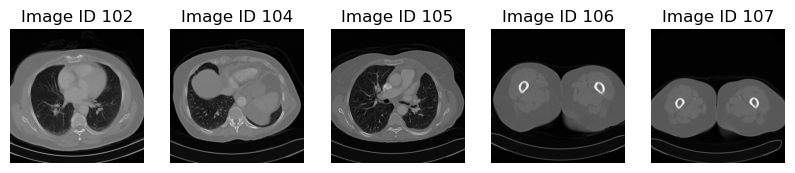

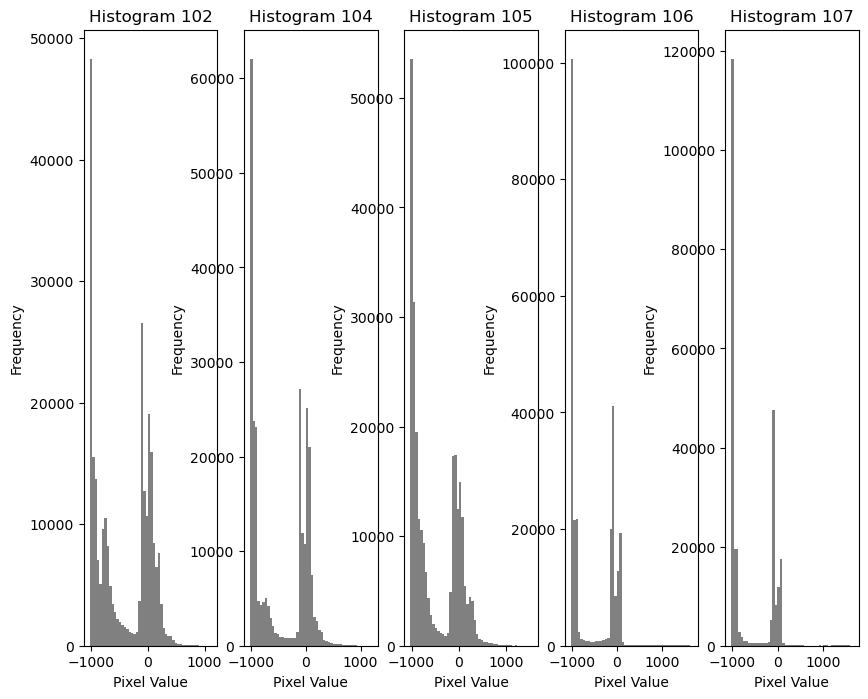

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Φόρτωση του αρχείου images_375_no_metadata.npz
data_375 = np.load('images_375_no_metadata.npz', allow_pickle=True)

# 2. Ανάκτηση των εικόνων και των index
images_375 = data_375['image']
indices_375 = data_375['idx']

# 3. Έλεγχος των πρώτων 5 εικόνων και εκτύπωση του σχήματος των δεδομένων
print(f"Σχήμα των δεδομένων εικόνας: {images_375.shape}")
print(f"Σχήμα των δεδομένων index: {indices_375.shape}")

# 4. Εμφάνιση 5 πρώτων εικόνων
plt.figure(figsize=(10, 8))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_375[i], cmap='gray')
    plt.title(f"Image ID {indices_375[i]}")
    plt.axis('off')

plt.show()

# 5. Ιστογράφημα των pixel values για τις πρώτες 5 εικόνες
plt.figure(figsize=(10, 8))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.hist(images_375[i].ravel(), bins=50, color='gray')
    plt.title(f'Histogram {indices_375[i]}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()
